In [1]:
# if you installed the nico package 

import nico 
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov



# if you did not install the nico package and downloaded the nico related scripts into the current directory

#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter
#import numpy as np
#import time
import matplotlib.pyplot as plt 
import pickle

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.1 #set the value globally

# please use Helvetica font according to your OS to ensure compatibility with Adobe Illustrator. 
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.sans-serif'] = ['Helvetica']

# Use the default font for all the figures 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(nico.__version__)

1.6.0


### Usage introduction 
For details of the function usage and input parameters either refer to the documentation or  <br>
just write the function and add ```.__doc__``` to retrieve infromation on all relelvant parameters.

```print(sann.find_anchor_cells_between_ref_and_query.__doc__)``` <br>
```print(sint.spatial_neighborhood_analysis.__doc__)``` <br>
```print(scov.gene_covariation_analysis.__doc__)``` <br>

All the figures will be saved in ``saveas=pdf`` format as vector graphics by default. <br>
For every function that generates  figures, the following default parameters are used: <br>
transparent_mode=False, saveas='pdf',showit=True, dpi=300 

For saving figures in png format, set saveas='png'  <br>
For generating images without background, set transparent_mode=True <br>
If figure outputs within the Jupyter Notebook is not desired, set showit=False

Please download the sample data from the git repository 
https://github.com/ankitbioinfo/nico_tutorial and <br> keep all the files and folders in the same directory to complete the tutorial. <br>
Unzip inputRef.zip and inputQuery.zip. 

inputRef  (single-cell RNA-sequencing data)  <br>
inputQuery (single-cell resolution spatial transcriptomics data) <br>
NiCoLRdb.txt (Ligand-receptor database file) 

Before running this notebook, input data need to be prepared by running the Start_Data_prep.ipynb notebook <br>
Once all the steps of Start_Data_prep.ipynb are completed, the following commands can be executed to run a complete NiCo analysis. 

In [4]:
#parameters for saving plots
saveas='png'
transparent_mode=False
dpi=300
showit=True

In [5]:
ref_datapath='./inputRef/'
query_datapath='./inputQuery/'



output_nico_dir='./nico_out/'
output_annotation_dir=None #uses default location
#output_annotation_dir=output_nico_dir+'annotations/'
annotation_save_fname= 'nico_celltype_annotation.h5ad'
inputRadius=0

The cell type annotation slot of the scRNA-seq data is assigned to ``ref_cluster_tag`` <br>
For example, in an AnnData object the name of the slot could be adata.obs['cluster'] <br>
In this slot, the cell type annotation of the scRNA-seq data is stored. 

In [6]:
ref_cluster_tag='cluster' #scRNAseq cell type slot 
annotation_slot='nico_ct' #spatial cell type slot 

# Module A: Perform cell type annotation of spatial data 

First find anchored cells between two modalities 


In [7]:
anchors_and_neighbors_info=sann.find_anchor_cells_between_ref_and_query(
refpath=ref_datapath,
quepath=query_datapath,
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir)


#Hidden filenames in the function. If you have different filenames you can change them.  
#spatial_sct_anndata_filename = 'sct_spatial.h5ad',
#sc_sct_anndata_filename = 'sct_singleCell.h5ad',
#sc_full_anndata_filename= 'Original_counts.h5ad',

### Selection of parameters 
Perform NiCo cell type annotation using the spatial Leiden cluster from the <br> Start_Data_prep.ipynb notebook,
e.g., with Leiden resolution parameter 0.4  <br>

If you have a large number of cells (>200,000) and want to perform <br>
cell type annotation with different Leiden resolution parameters or <br>
any other parameters, save the output_annotation_dir directory with <br>
a different name for each run.

MNN (Mutual Nearest Neighbors) alignment takes a considerable amount <br>
of time, which can delay the analysis on an ordinary laptop. Therefore, it is <br>
advisable to save the anchors_data_50.npz file, as the anchor information is <br>
independent of the resolution parameter.  

### Availability of annotation slot in scRNA-seq data 
ref_cluster_tag='cluster' <br>

ref_cluster_tag define the cell type slot for the scRNA-seq data. <br>
In this example, the annotation slot in the scRNA-seq data is 'cluster'. <br>
Example  .obs['cluster']  <br>
If scRNA-seq cell type annotation is stored in another slot then please <br>
change the parameter of "ref_cluster_tag" to your slot name <br>

### Availability of guiding annotation slot in spatial data 
guiding_spatial_cluster_resolution_tag='leiden0.4' <br>

guiding_spatial_cluster_resolution_tag define the Leiden clustering slot for the spatial data. <br>
Example .obs['leiden0.4'] <br>
Please change the parameter of "guiding_spatial_cluster_resolution_tag" for the other resoution of Leiden clustering. 


In [8]:
output_info=sann.nico_based_annotation(anchors_and_neighbors_info,
guiding_spatial_cluster_resolution_tag='leiden0.4',
across_spatial_clusters_dispersion_cutoff=0.15,
ref_cluster_tag=ref_cluster_tag,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

This function ``sann.delete_files`` deletes the anchor file details <br>
created in the ``find_anchor_cells_between_ref_and_query`` step.  <br>
If you have a large number of cells and want to experiment with different  <br>
annotation parameters, do not delete this file as it can takes a <br>
significant amount of time to compute. 

In [9]:
sann.delete_files(output_info)

In [10]:
# Visualize the anchor cells between two modalities. 
# sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

### Save the annotation file into AnnData object

Save the annotation file into AnnData object (annotation_save_fname) <br>
along with given expression matrix in "output_nico_dir" directory. 


In [11]:
sann.save_annotations_in_spatial_object(output_info,
anndata_object_name=annotation_save_fname)

Nico cell type cluster are saved in following path './nico_out/' as <anndata>.obs['nico_ct'] slot


## Note: Annotations from different computational methods such cell2location or TACCO 

If you would like to use an available AnnData object with cell type annotations <br>
obtained with a different method, you can skip the previous steps.

To use your own annotations, replace the following file <br>

annotation_save_fname= ‘nico_celltype_annotation.h5ad’  <br> 
replaced with  <br> 
annotation_save_fname= 'other_method_celltype_annotations.h5ad'


The content of the AnnData object is as follows: 

The necessary slots are adata.obs['nico_ct'] or any other slot for cell type annotation,  <br>
adata.obsm['spatial'] for spatial coordinates, <br>
adata.obsm['X_umap'] for 2D umap coordinates, <br>
adata.X is normalized count data, and <br>
adata.raw.X for raw count data. <br>

With this file the remaining tutorial can be finished.

### Visualize the spatial annotations of all cell types 
Left side: tissue map, Right side: UMAP 

The figures are saved:  ./nico_out/annotations/tissue_and_umap_with_all_celltype_annotations.png


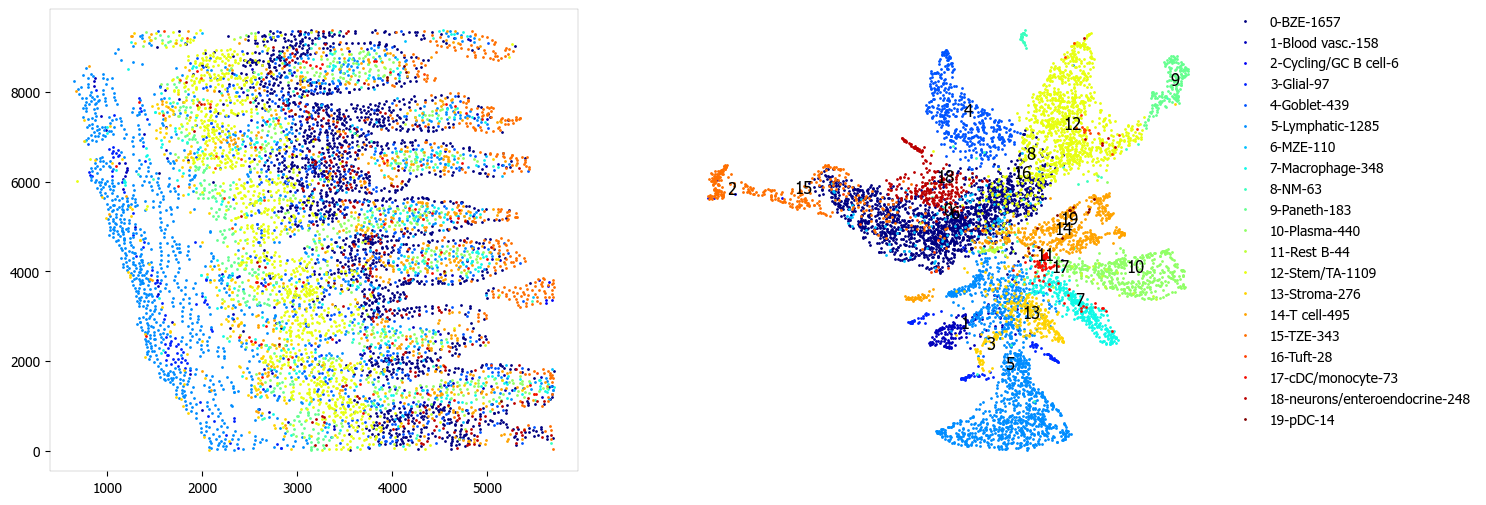

In [12]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes( 
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
#spatial_cluster_tag='nico_ct',
spatial_cluster_tag=annotation_slot,    
spatial_coordinate_tag='spatial',
umap_tag='X_umap',
showit=showit, 
saveas=saveas,transparent_mode=transparent_mode)

### Visualize  spatial annotations of selected pairs (or larger sets) of cell types  
Left side: tissue map, Right side: UMAP 

[['Stem/TA', 'Paneth'], ['Paneth', 'Goblet']]
The figures are saved:  ./nico_out/annotations/fig_individual_annotation/Stem_TA0.png
The figures are saved:  ./nico_out/annotations/fig_individual_annotation/Paneth1.png


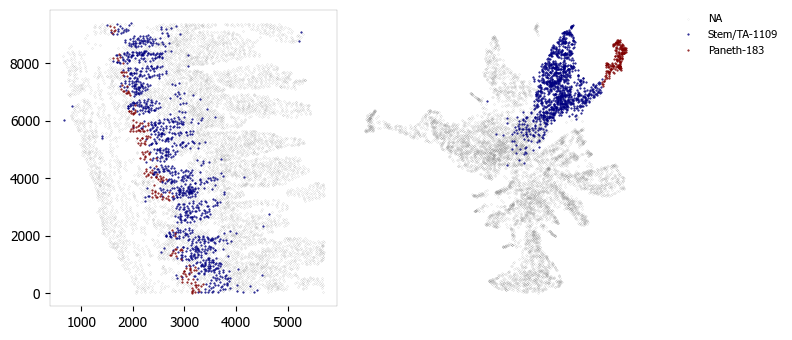

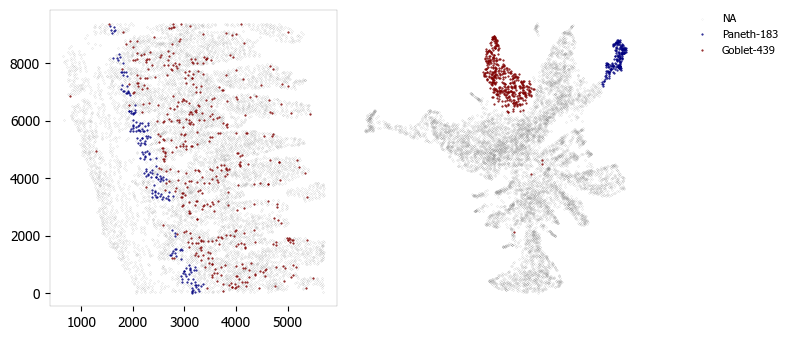

In [13]:
choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]

sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(
choose_celltypes=choose_celltypes,    
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
spatial_coordinate_tag='spatial',
umap_tag='X_umap',
showit=showit,saveas=saveas,transparent_mode=transparent_mode)


In [14]:
# For visualizing every cell type individually, leave list choose_celltypes list empty.  
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Module B: Infer significant niche cell type interactions 

### Radius definition 

If the radius in NiCo is set to R=0, NiCo incorporates the neighboring cells <br>
that are in immediate contact with the central cell to construct the expected <br>
neighborhood composition matrix. We envision NiCo as a method to explore <br>
direct interactions with physical neighbors (R=0), but in principle <br>
finite distance interactions mediated by diffusive factors could be <br>
explored by increasing R and comparing to the interactions obtained with <br>
R=0.

It may be helpful to explore a larger radius if it is expected that cell <br>
types interact through long-range interactions. However, during the <br>
covariation task, immediate neighbors typically capture the strongest <br>
signal, while a larger radius averages the signal from a bigger number of cells, <br> 
potentially diluting the signal. Therefore, we recommend running NiCo with R=0. <br>


Perform  neighborhood analysis across direct neighbors <br> 
(juxtacrine signaling, R=0) of the central niche cell type.   

To exclude cell types from the neighborhood analysis, <br> 
add celltype names to the list removed_CTs_before_finding_CT_CT_interactions. <br>

In the example below, the cell types Basophils, Cycling/GC B cell, <br>
and pDC would not be included in the niche interaction task due to their low abundance. 

In [15]:
do_not_use_following_CT_in_niche=['Basophils','Cycling/GC B cell','pDC']

niche_pred_output=sint.spatial_neighborhood_analysis(
Radius=inputRadius,
output_nico_dir=output_nico_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag='nico_ct',
removed_CTs_before_finding_CT_CT_interactions=do_not_use_following_CT_in_niche)


average neighbors: 4.837038047183963
average distance: 64.09758818509228
data shape (7304, 19) (7304,) neighbor shape (7304, 17)
Searching hyperparameters  Grid method: 0.00390625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.0078125
Searching hyperparameters  Grid method: 0.00390625
Inverse of lambda regularization found 0.00390625
training (5844, 17) testing (1460, 17) coeff (17, 17)


In [16]:
# this cutoff is use for the visualization of cell type interactions network 
celltype_niche_interaction_cutoff=0.1


In some computing environments, pygraphviz is not able to load the neato package automatically. <br>
In such cases, please define the location of the neato package.  <br>
If you install pygraphviz through conda ```conda install -c conda-forge pygraphviz``` <br>
then most likely it should work. 
```
import pygraphviz
a=pygraphviz.AGraph()
a._get_prog('neato')

import os
if  not '/home/[username]/miniforge3/envs/SC/bin/' in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + '/home/[username]/miniforge3/envs/SC/bin/'
```

### Example A:  Plot the niche interaction network without any edge weight details for cutoff 0.1 

In the following plot you can reduce the opacity of colors using the `alpha` parameter and change the colormap with `input_colormap`. 
The popoular choice of colormaps are following: 
'summer', 'autumn', 'winter', 'cool', 'Wistia',  'hot', 'afmhot', 'gist_heat', 'copper','Diverging', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gist_rainbow', 'rainbow', 'jet', 'turbo' \
For more detail colormap options, refer to the [matplotlib colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) 



The figures are saved:  ./nico_out/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.png


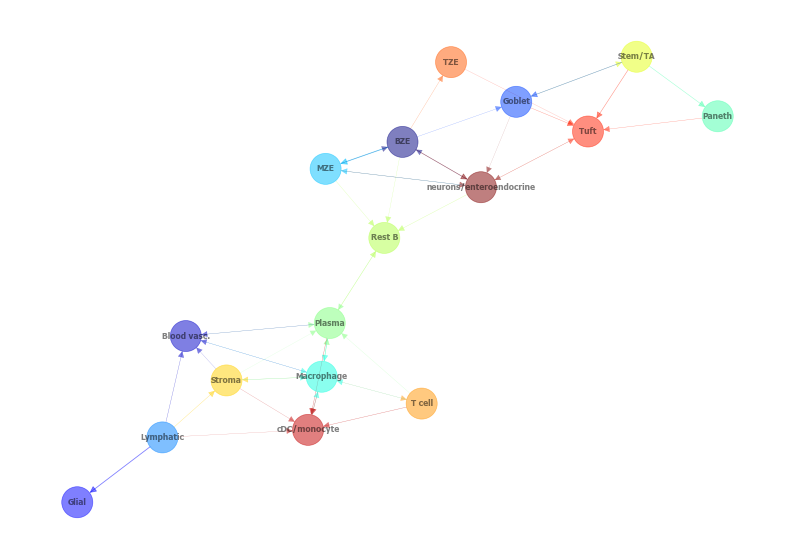

In [17]:
sint.plot_niche_interactions_without_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,                #Resolution in dots per inch for saving the figure.
input_colormap='jet',   #Colormap for node colors, from matplotlib colormaps.
with_labels=True,       #Display cell type labels on the nodes, if True.
node_size=500,          #Size of the nodes. 
linewidths=0.5,         #Width of the node border lines. 
node_font_size=6,       #Font size for node labels.
alpha=0.5,              #Opacity level for nodes and edges. 1 is fully opaque, and 0 is fully transparent. 
font_weight='bold'      #Font weight for node labels; 'bold' for emphasis, 'normal' otherwise. 
)


### Example B: Using edge weights included in the niche interaction plot can be done as shown below


The figures are saved:  ./nico_out/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.png


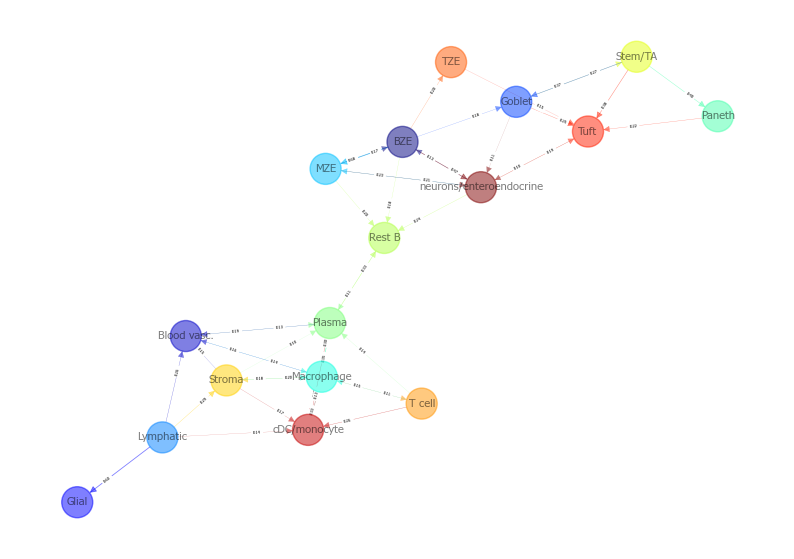

In [18]:
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,
input_colormap='jet',
with_labels=True,
node_size=500,
linewidths=1,
node_font_size=8,
alpha=0.5,
font_weight='normal',
edge_label_pos=0.35,   #Relative position of the weight label along the edge. 
edge_font_size=3       #Font size for edge labels.  
)

### Individual cell type niche plot 

To plot regression coefficients of niche cell types for given central cell types, ordered by magnitude, <br>
add cell type names for the desired central cell types to the list argument choose_celltypes (e.g. Stem/TA <br>
and Paneth cells).


The figures are saved:  ./nico_out/niche_prediction_linear/TopCoeff_R0/Rank1_Paneth.png
The figures are saved:  ./nico_out/niche_prediction_linear/TopCoeff_R0/Rank3_Stem_TA.png


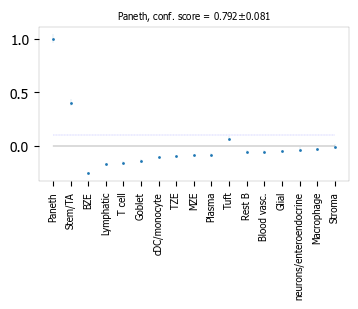

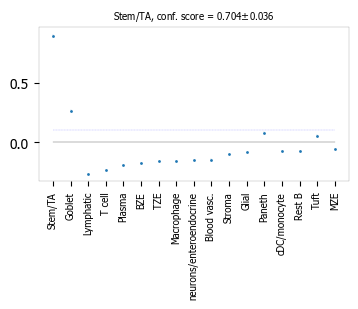

In [19]:
# Blue dotted line in following plot indicates the celltype_niche_interaction_cutoff

sint.find_interacting_cell_types(niche_pred_output,
choose_celltypes=['Stem/TA','Paneth'],
celltype_niche_interaction_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode,dpi=dpi,showit=showit,figsize=(4.0,2.0))

If regression coefficients for the niche neighborhoods of all cell <br>
types should be plotted or saved, then leave the choose_celltypes list <br>
argument empty.

In [20]:
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

In [21]:
# Plot the ROC curve of the classifier prediction for one of the cross-folds. 
# sint.plot_roc_results(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode))
# sint.plot_predicted_probabilities(niche_pred_output)


Plot the average confusion matrix of the classifier from cross-folds 

The figures are saved:  ./nico_out/niche_prediction_linear/Confusing_matrix_R0.png


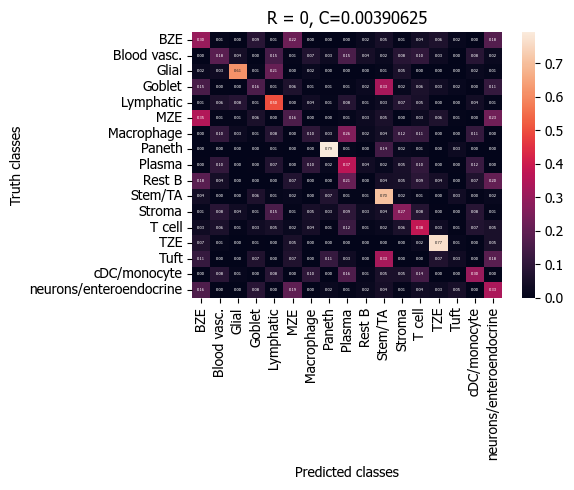

In [22]:
sint.plot_confusion_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,dpi=dpi,figsize=(6,5))

Plot the average coefficient matrix of the classifier from cross-folds 

The figures are saved:  ./nico_out/niche_prediction_linear/weight_matrix_R0.png


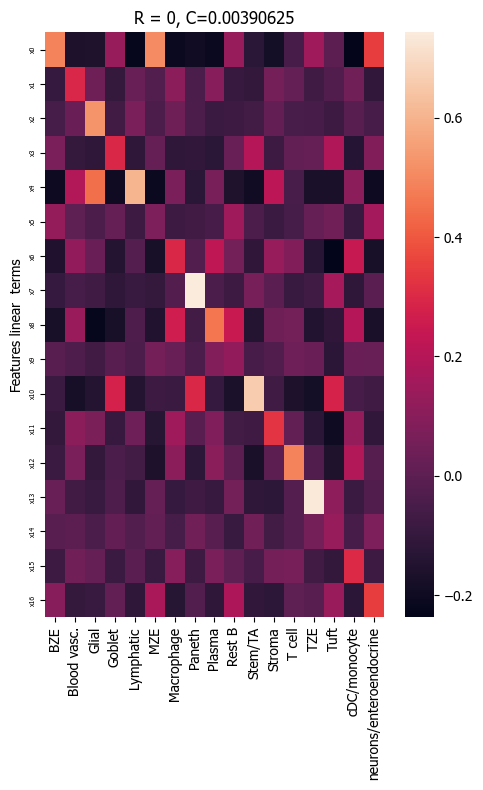

In [23]:
sint.plot_coefficient_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,dpi=dpi)

Plot the evaluation score of the classifier for different metrics 

The figures are saved:  ./nico_out/niche_prediction_linear/scores_0.png


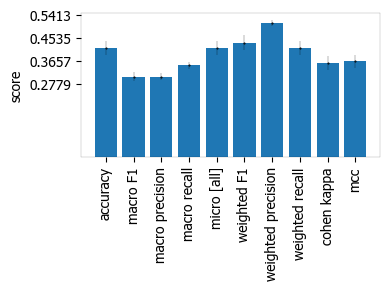

In [24]:
sint.plot_evaluation_scores(niche_pred_output, 
saveas=saveas, transparent_mode=transparent_mode,showit=showit,dpi=dpi,figsize=(4,3))

### Visualization of top co-localized cell-type pairs 

Observed counts: Count of cell type pairs ("CC-NC" or "NC-CC") in the neighborhood graph <br>
Expected counts: Observed counts divided by random counts from the permutation of cell type identity in the neighborhod graph. 

CC: Central cell <br>
NC: Neighborhood or Niche cell 

The 1000 random permutation might take a bit longer time. So you can reduce this number to save time. 
This task only suggest which interaction is most enriched.

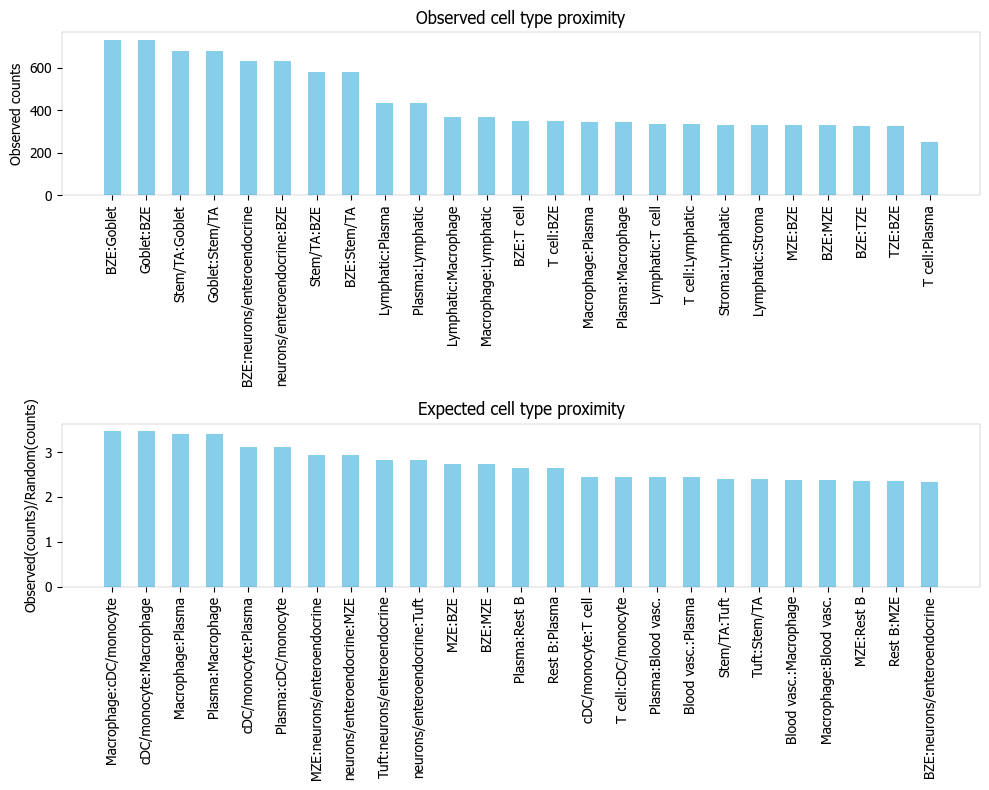

In [25]:
observed,expected=sint.visualization_of_top_celltype_proximity_pairs(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode,
n_rand_permute=1000, 
number_of_top_pairs_for_visualization=25, 
remove_self_pairs=True, 
barwidth=0.5,                                                    
figsize=(10, 8))

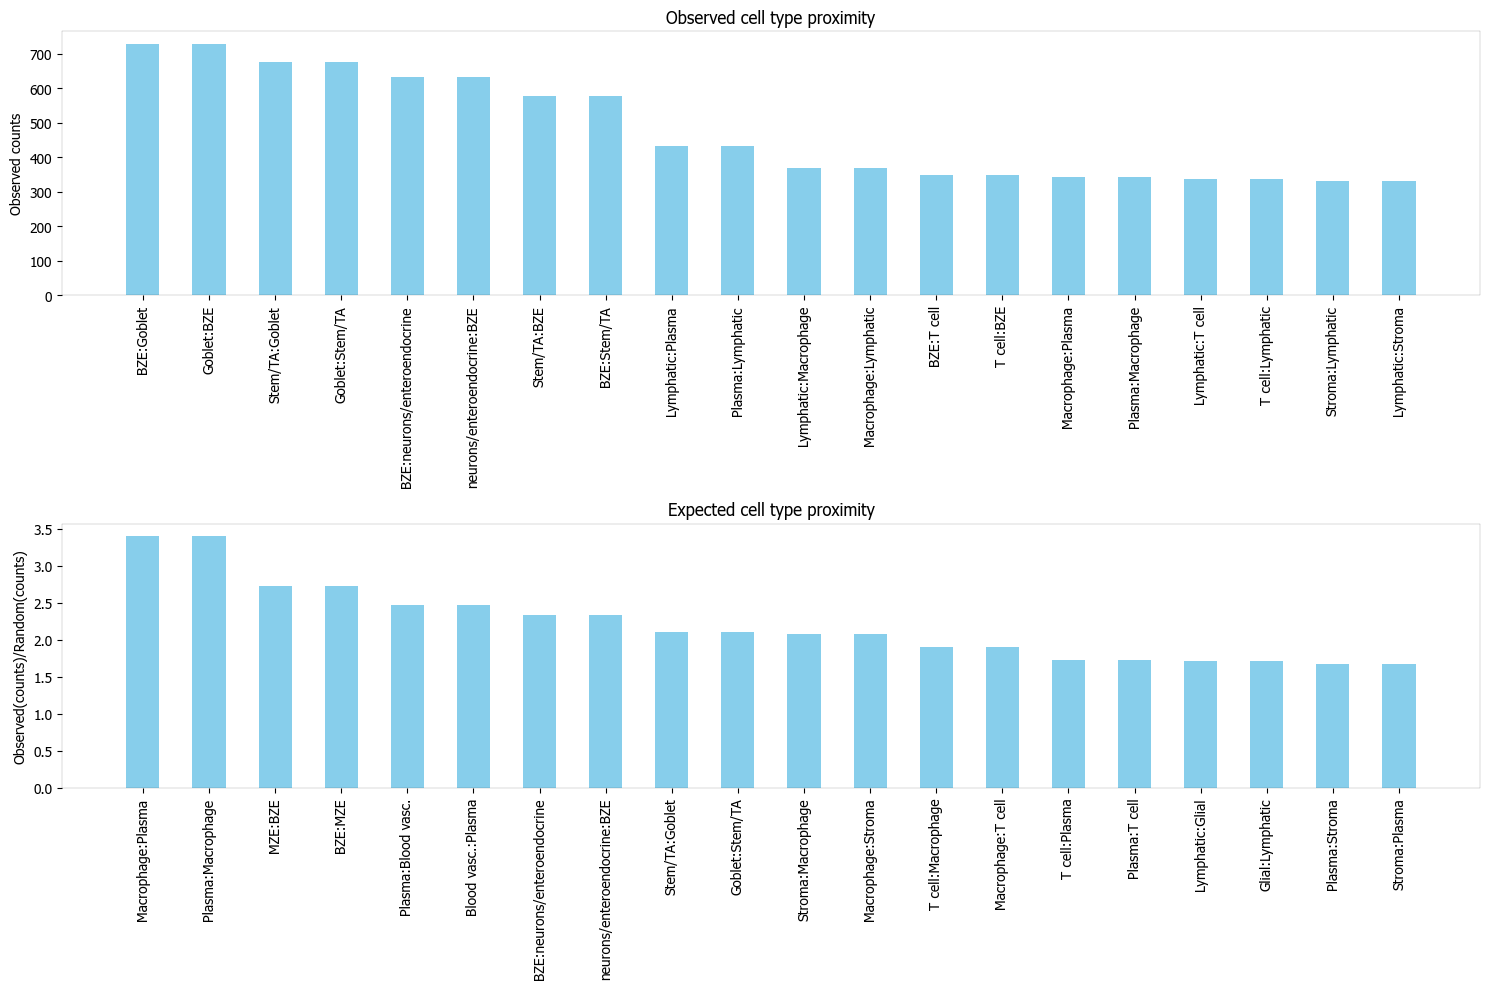

In [26]:
# Sometimes the expected cell-type proximity becomes large because both the numerator and denominator become very small.
# Therefore, we may want to require not only a high expected value but 
# also a minimum observed frequency of at least 100 (Observed_Threshold).

observed,expected=sint.visualization_of_top_celltype_proximity_pairs(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode,
n_rand_permute=1000, Observed_Threshold=100,
number_of_top_pairs_for_visualization=20, 
remove_self_pairs=True, 
figsize=(15, 10))

In [27]:
#Top 5 expected pairs 
sorted(expected.items(), key=lambda x: x[1], reverse=True)[:5]

[('Macrophage:Plasma', 3.399337971497096),
 ('Plasma:Macrophage', 3.399337971497096),
 ('MZE:BZE', 2.7275289748138816),
 ('BZE:MZE', 2.7275289748138816),
 ('Plasma:Blood vasc.', 2.47410943007904)]

# Module C: Perform niche cell state covariation analysis using latent factors

Note: From module C onwards, Jupyter cells are independent of previous steps. <br>
Therefore, if you want to try different settings, you do not need to run the previous Jupyter cells.

### Covariations parameters settings 
Infer desired number of latent factors (e.g., no_of_factors=3) for each <br>
cell type from both modalities using integrated non-negative matrix <br>
factorization. Set iNMFmode=False for applying the conventional <br>
non-negative matrix factorization method. In this case, latent factors <br>
will be derived from the scRNA-seq data and transfered to the spatial <br>
modality.

This option is preferable if spatial data are affected by substantial <br>
technical noise due to unspecific background signal or gene expression <br>
spill-over between neighboring cell types due to imperfect segmentation.

### Ligand-Receptor database file 
NiCoLRdb.txt is the name of the ligand-receptor database file. Users can <br>
use databases of similar format from any resource.

NiCoLRdb.txt was created by merging ligand-receptor pairs from NATMI, <br>
OMNIPATH, and CellPhoneDB. It can be downloaded from github <br>
and saved in the local directory from where this notebook is run.


In [28]:
# By default, the function is run with spatial_integration_modality='double', i.e. 
# it integrates spatial transcriptomics with scRNAseq data

# By default covariation runs only on those neigboring niche cells for a central cell niche 
# who have +ve coefficient in this function `find_interacting_cell_types` 
# If you want to perform covariation for all niche cells irrespective of +ve or -ve coefficient 
# then use "logistic_coef_cutoff=-10" (by default this value is 0)


cov_out=scov.gene_covariation_analysis(iNMFmode=True,
        Radius=inputRadius,
        no_of_factors=3,
        refpath=ref_datapath,
        quepath=query_datapath,
        spatial_integration_modality='double',
        output_niche_prediction_dir=output_nico_dir,
        ref_cluster_tag=ref_cluster_tag,LRdbFilename='NiCoLRdb.txt')

common genes between sc and sp 203 203


 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'BZE', 'Rest B', 'Blood vasc.', 'Goblet', 'Macrophage', 'Lymphatic', 'T cell', 'neurons/enteroendocrine', 'Tuft', 'Paneth', 'Stem/TA', 'Plasma', 'MZE', 'Stroma', 'cDC/monocyte', 'Glial', 'TZE'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, if any spatial cell type does not exist in the scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 



Blood vasc. alpha, H size, W size, spH size: 8 (3, 33) (58, 3) (3, 158)
Glial alpha, H size, W size, spH size: 2 (3, 10) (44, 3) (3, 97)
Goblet alpha, H size, W size, spH size: 12 (3, 216) (128, 3) (3, 439)
MZE alpha, H size, W size, spH size: 22 (3, 63) (58, 3) (3, 110)
Macrophage alpha, H size, W size, spH size: 20 (3, 89) (113, 3) (3, 348)
Plasma alpha, H size, W size, spH

### Visualize the cosine similarity and Spearman correlation between genes and latent factors 

The following function generates output for the top 30 genes based on cosine <br>
similarity (left) or Spearman correlation (right) with latent factors.

Select cell types by adding IDs to the list argument choose_celltypes, or <br>
leave empty for generating output for all cell types.

cell types found  ['Paneth']
The figures are saved:  ./nico_out/covariations_R0_F3/NMF_output/Paneth.png


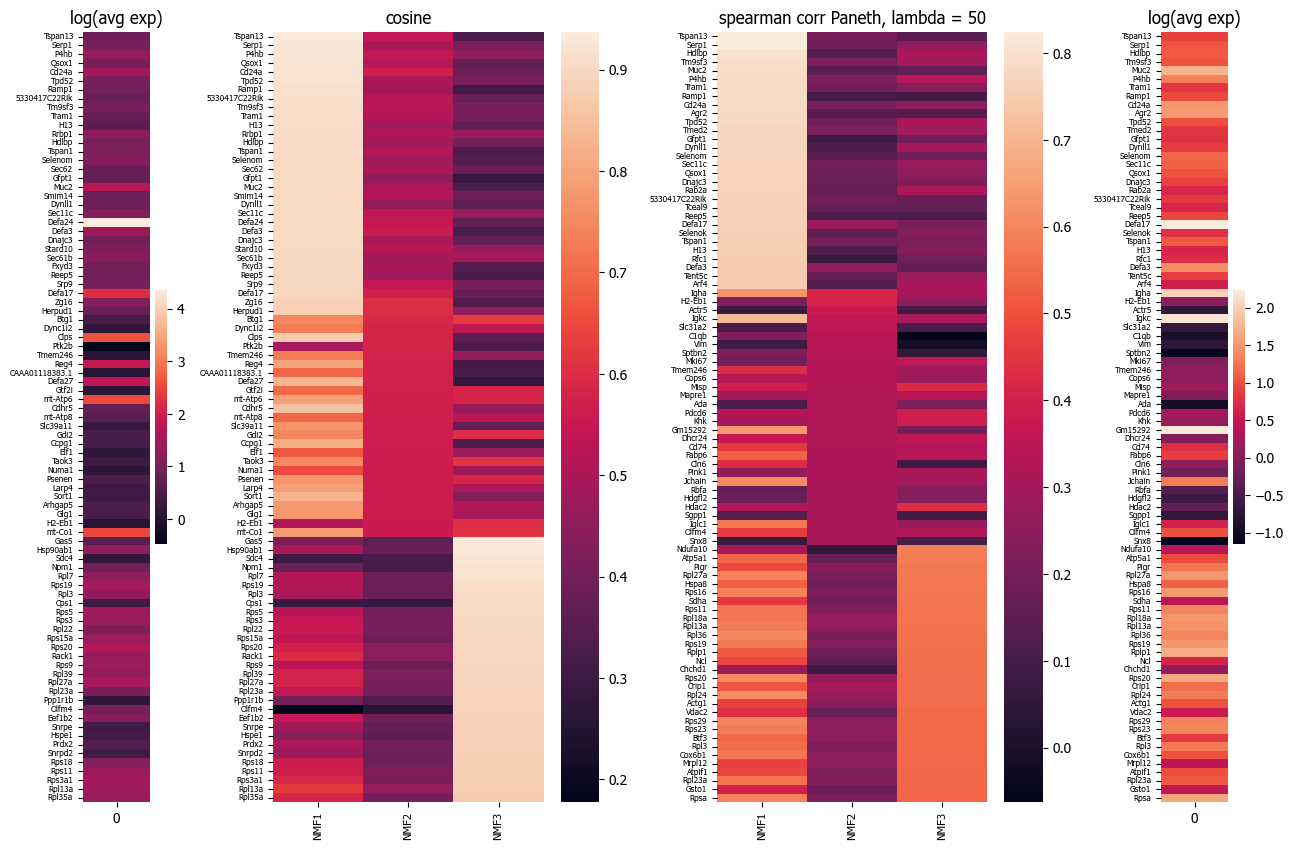

In [29]:
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Paneth'],
NOG_Fa=30,saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(15,10),dpi=dpi)

cell types found  ['Stem/TA']
The figures are saved:  ./nico_out/covariations_R0_F3/NMF_output/Stem_TA.png


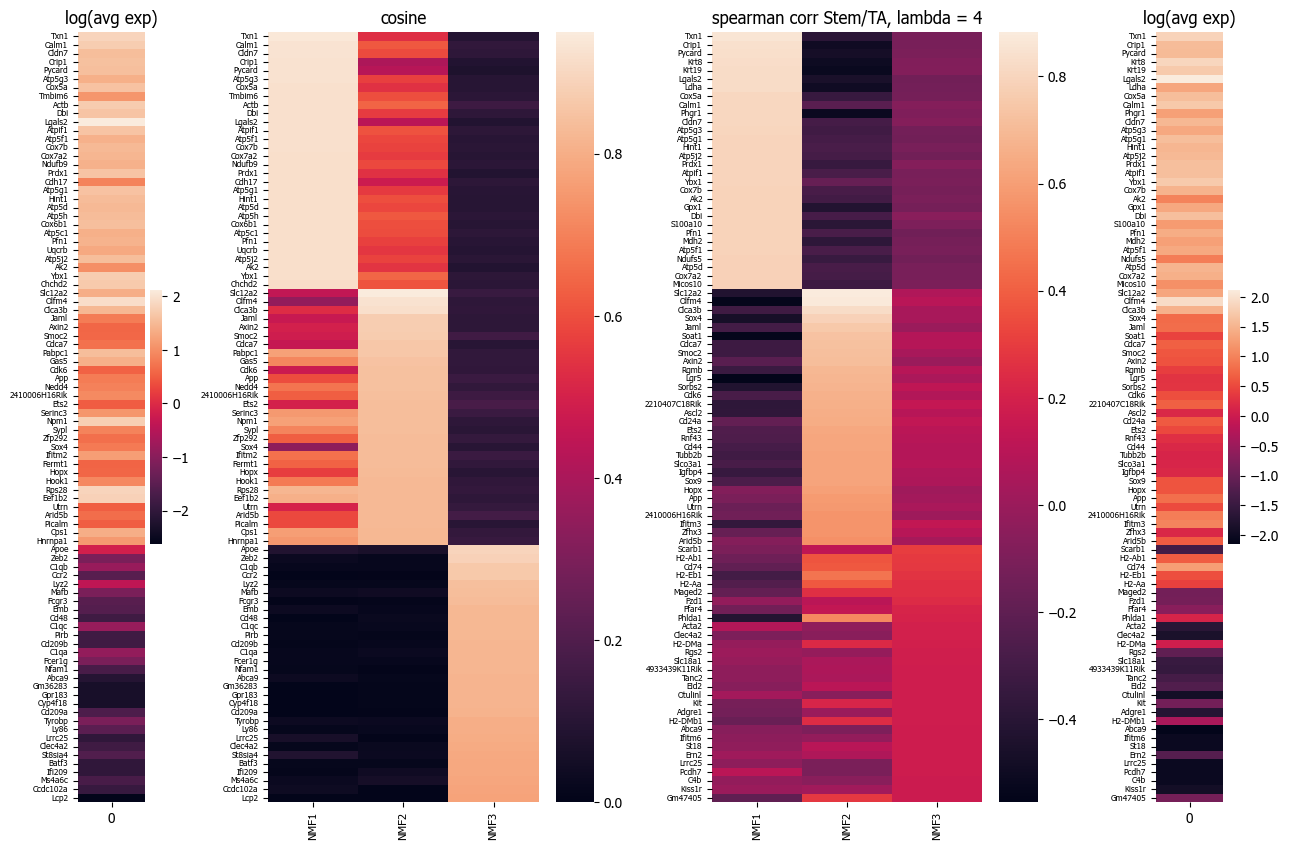

In [30]:
# Cosine and spearman correlation: visualize the correlation of genes from NMF
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Stem/TA'],
NOG_Fa=30,saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(15,10),dpi=dpi)

### Visualizes genes associated with the latent factors along with average expression
Call the following function <br>
(scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype) to <br>
visualize correlation and expression of genes associated with factors.

For example, visualize and extract the top 20 genes (top_NOG=20) <br>
correlating negatively (positively_correlated=False) by Spearman <br>
correlation (correlation_with_spearman=True) for cell type Stem/TA <br>
(choose_celltype=‘Stem/TA’) to factor 1 (choose_factor_id=1)


The figures are saved:  ./nico_out/covariations_R0_F3/dotplots/Factors_Stem_TA.png


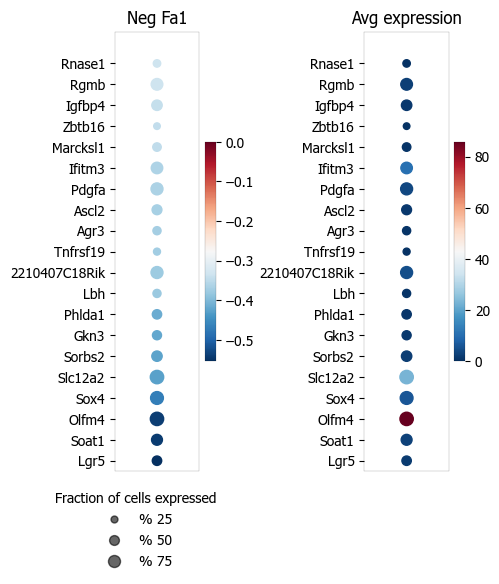

In [31]:
dataFrame=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(
cov_out,
choose_celltype='Stem/TA',
choose_factor_id=1,
top_NOG=20,
organism='Mouse',rps_rpl_mt_genes_included=True,  
correlation_with_spearman=True,
positively_correlated=False,dpi=dpi,showit=showit,
saveas=saveas,transparent_mode=transparent_mode )

### Inspect genes associated with a latent factor
Inspect the top genes associated with a the given factor. The table summarizes the <br>
positive or negative spearman correlation or cosine similarity with the factor, the mean <br>
expression and the proportion of cells expressing the gene for the respective cell type.


In [32]:
dataFrame

Gene        Fa  mean_expression  \
0            Lgr5 -0.554356         1.985714   
1           Soat1 -0.541652         2.752381   
2           Olfm4 -0.540245        85.804764   
3            Sox4 -0.468422         6.140476   
4         Slc12a2 -0.427738        22.964285   
5          Sorbs2 -0.425296         2.016667   
6            Gkn3 -0.420437         1.452381   
7          Phlda1 -0.415100         1.309524   
8             Lbh -0.379591         0.680952   
9   2210407C18Rik -0.377026         4.821429   
10       Tnfrsf19 -0.373549         0.402381   
11           Agr3 -0.370683         0.673810   
12          Ascl2 -0.369964         1.516667   
13          Pdgfa -0.365959         3.902381   
14         Ifitm3 -0.362247        10.678572   
15       Marcksl1 -0.347785         0.733333   
16         Zbtb16 -0.346387         0.423810   
17         Igfbp4 -0.342717         1.480952   
18           Rgmb -0.334583         2.495238   
19         Rnase1 -0.334274         0.509524   

    proportion_of_population_expressed  
0                             0.459524  
1                             0.611905  
2                             0.921429  
3                             0.847619  
4                             0.930952  
5                             0.554762  
6                             0.423810  
7                             0.452381  
8                             0.338095  
9                             0.740476  
10                            0.252381  
11                            0.342857  
12                            0.500000  
13                            0.740476  
14                            0.683333  
15                            0.371429  
16                            0.223810  
17                            0.559524  
18                            0.702381  
19                            0.285714

### Save the latent factors into an excel sheet
Save data in an excel sheet for each cell type, including latent factor <br>
associations of all genes according to Spearman correlation and cosine <br>
similarity.

In [33]:
scov.make_excel_sheet_for_gene_correlation(cov_out)

# Module D: Cell type covariation visualization

Plot linear regression coefficients between factors of the central cell type (y-axis, <br>
defined by list argument choose_celltypes) and factors of niche cell types (x-axis). <br>

Circle size scales with -log10(p-value) (indicated as number on top of <br>
each circle). To generate plots for all cell types, leave list argument <br>
choose_celltypes empty.


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./nico_out/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


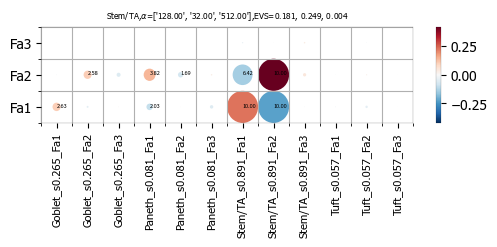

In [34]:
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=choose_celltypes, 
mention_pvalue=True,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(6,1.25))


In the following example, a p-value cutoff is explicitely defined by the <br>
pvalue_cutoff argument and -log10(p-value) is not printed on top of the <br>
circles.

cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./nico_out/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


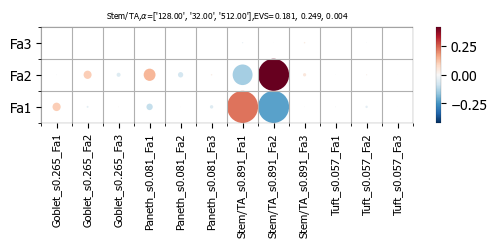

In [35]:
choose_celltypes=['Stem/TA']

scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=choose_celltypes,
pvalue_cutoff=0.05,mention_pvalue=False,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(6,1.25))


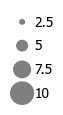

In [36]:
scov.print_pvalue_sizebar(cov_out,number_of_dots_to_print=4,gray_level=0.5,
saveas='pdf',transparent_mode=transparent_mode,showit=showit,dpi=dpi,figsize=(0.68,1.25))

### Visualize as heatmap instead of circle plot 

Plot regression coefficients between niche cell types (x-axis) and central cell <br>
type (y-axis, defined by list argument choose_celltypes) as heatmap. 

Leave list argument choose_celltypes empty to generate plots for all <br>
cell types. The top subfigure shows the coefficients and bottom subfigure <br>
shows the -log10 p-values.

cell types found  ['Stem/TA']
The regression figures as pvalue heatmap plots are saved in following path  ./nico_out/covariations_R0_F3/Regression_outputs/pvalue_coeff_heatmap_*


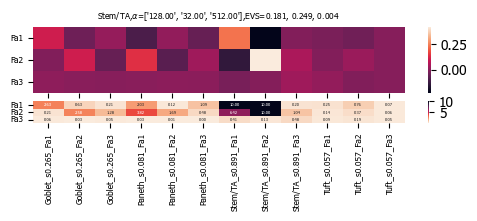

In [37]:
scov.plot_significant_regression_covariations_as_heatmap(cov_out,
choose_celltypes=['Stem/TA'],dpi=dpi,showit=showit, 
saveas=saveas,transparent_mode=transparent_mode, figsize=(6,1.25))

# Module E: Analysis of ligand-receptor interactions between covarying niche cell types

### Save excel sheets and summary in text file  
Save all ligand-receptor interactions infered for the niche of each cell <br>
type in an excel sheet, and a summary of significant niche <br>
interactions in a text file.

In [38]:
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(cov_out,
pvalueCutoff=0.05,correlation_with_spearman=True,
Ligand_Factor_thres=0.1,
Receptor_Factor_thres=0.1,
Ligand_proportion_of_cells_expressed_thres=0.1,
Receptor_proportion_of_cells_expressed_thres=0.1,
number_of_top_genes_to_print=5)


The Excel sheet is saved:  ./nico_out/covariations_R0_F3/Lig_and_Rec_enrichment_in_interacting_celltypes.xlsx
The text file is saved: ./nico_out/covariations_R0_F3/Regression_summary.txt


### The following code visualizes the change in factor loadings associated with colocalization between the two cell types.

Total number of colocalized celltype pairs 210
The figures are saved:  ./nico_out/covariations_R0_F3/colocalization/colocalize_celltypes_scatter.pdf
CC Loadings (109,) (109,)
NC Loadings (109,) (127,)
Not Colocalized (982,)


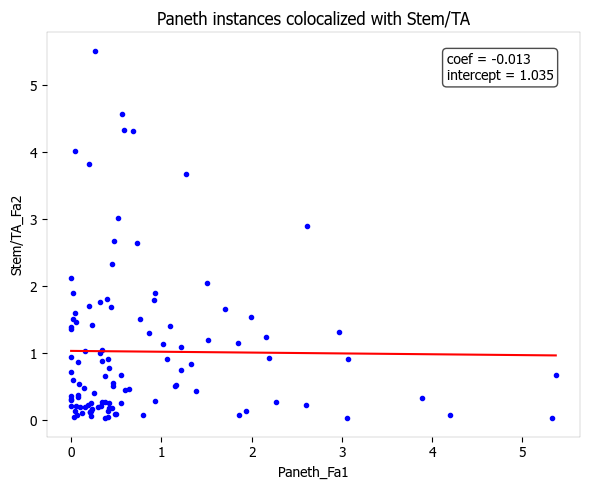

In [39]:
CC_name='Paneth'
NC_name='Stem/TA'
CC_factor_id=1
NC_factor_id=2

CC_out,NC_out,NC_not_colocalized_loadings=scov.visualization_of_colocalized_celltype_factors_as_scatterplot(cov_out,
CC_name, NC_name, CC_factor_id,NC_factor_id,axis_log_scale=False)

CC_colocalized_instance,CC_colocalized_loadings=CC_out
NC_colocalized_instance,NC_colocalized_loadings=NC_out


# CC_colocalized_instance: Loading of colocalized instance of central celltype for a given factor 
# NC_colocalized_instance: Avg loading of neighborhood celltype instance for a given factor

# CC_colocalized_loadings: Loading of unique colocalize instance of central celltype for a given factor 
# NC_colocalized_loadings: Loading of unique colozalize neighborhood celltype for a given factor 
# NC_not_colocalized_loadings: Loadings of unique not-colocalize neighborhood celltype for a given factor 

print("CC Loadings", CC_colocalized_instance.shape,CC_colocalized_loadings.shape)
print("NC Loadings", NC_colocalized_instance.shape,NC_colocalized_loadings.shape)
print("Not Colocalized",NC_not_colocalized_loadings.shape)


The figures are saved:  ./nico_out/covariations_R0_F3/colocalization/colocalize_celltypes_as_BarPlot.pdf


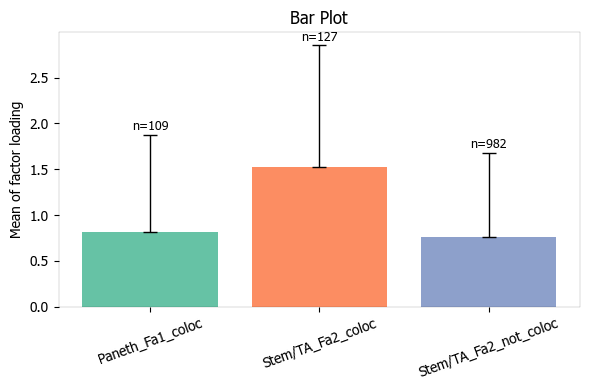

In [40]:
# One of the main questions is what happens when the two cell types are colocalized versus when they are not.
# Do the differential gene expression profiles differ between colocalized cells and non-colocalized cells?
# NiCo answer this using plotting factor loadings (as bar plots or violin plots) for a cell type 
# when it is colocalized versus when it is not.

scov.visualization_of_colocalized_celltype_factors_as_bar_violin_plot(cov_out,CC_name, NC_name,
CC_factor_id, NC_factor_id,
CC_colocalized_loadings, NC_colocalized_loadings, NC_not_colocalized_loadings, 
visualize_as='BarPlot')

The figures are saved:  ./nico_out/covariations_R0_F3/colocalization/colocalize_celltypes_as_ViolinPlot.pdf


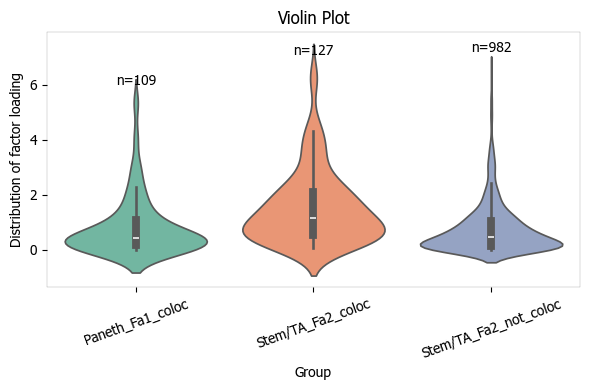

In [41]:
scov.visualization_of_colocalized_celltype_factors_as_bar_violin_plot(cov_out,CC_name, NC_name,
CC_factor_id, NC_factor_id,
CC_colocalized_loadings, NC_colocalized_loadings, NC_not_colocalized_loadings, 
visualize_as='ViolinPlot')

In [42]:
# This can save but may not portable across environments.
# with open(output_nico_dir+"covariation_output.pkl", "wb") as f:
#    pickle.dump(cov_out, f)

### Usage for ligand receptor visualizations 
Perform ligand-receptors analysis. In this example, output is generated <br>
for the ligand-receptor pairs associated with the interacting factor 1 of <br>
Stem/TA cells and factor 1 of Paneth cells.

choose_interacting_celltype_pair=[‘Stem/TA’,‘Paneth’]

choose_factors_id=[1,1] entries correspond to cell types in <br>
choose_interacting_celltype_pair, i.e., first factor ID corresponds to <br>
Stem/TA and second factor ID corresponds to Paneth.

By default, the analysis is saved in 3 separate figures (bidirectional, <br>
CC to NC and NC to CC). CC: central cell NC: niche cell

Our analysis accounts for bidirectional cellular crosstalk interactions <br>
of ligands and receptors in cell types A and B. The ligand can be <br>
expressed on cell type A and signal to the receptor detected on cell <br>
type B, or vice versa.

By changing the cutoff for minimum factor correlation of ligand/receptor <br>
genes (LR_plot_NMF_Fa_thres=0.2) or the cutoff for the minimum fraction <br>
of cells expressing the ligand/receptor genes (LR_plot_Exp_thres=0.2) <br>
the stringency of the output filtering can be controled.


LR figures for both ways are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


0

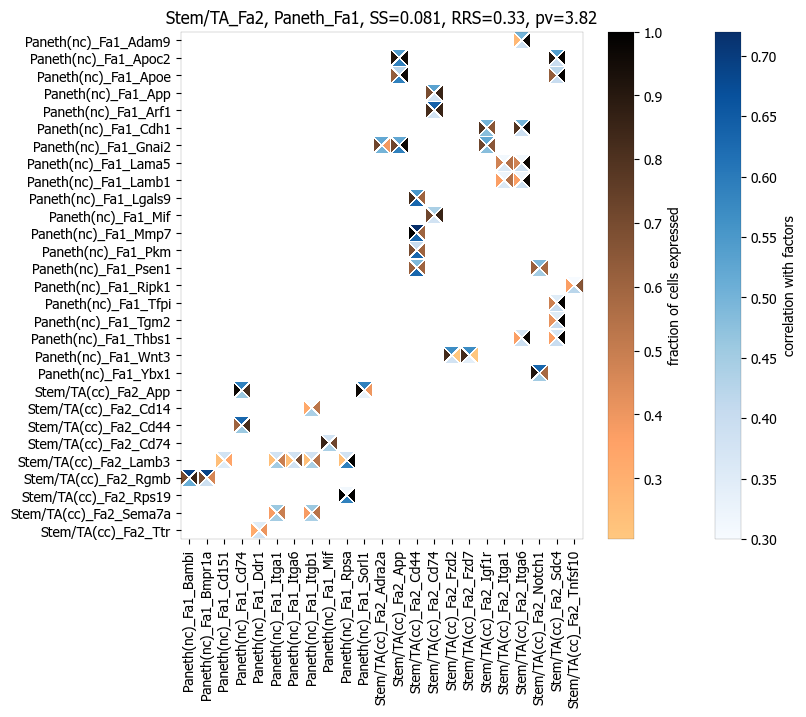

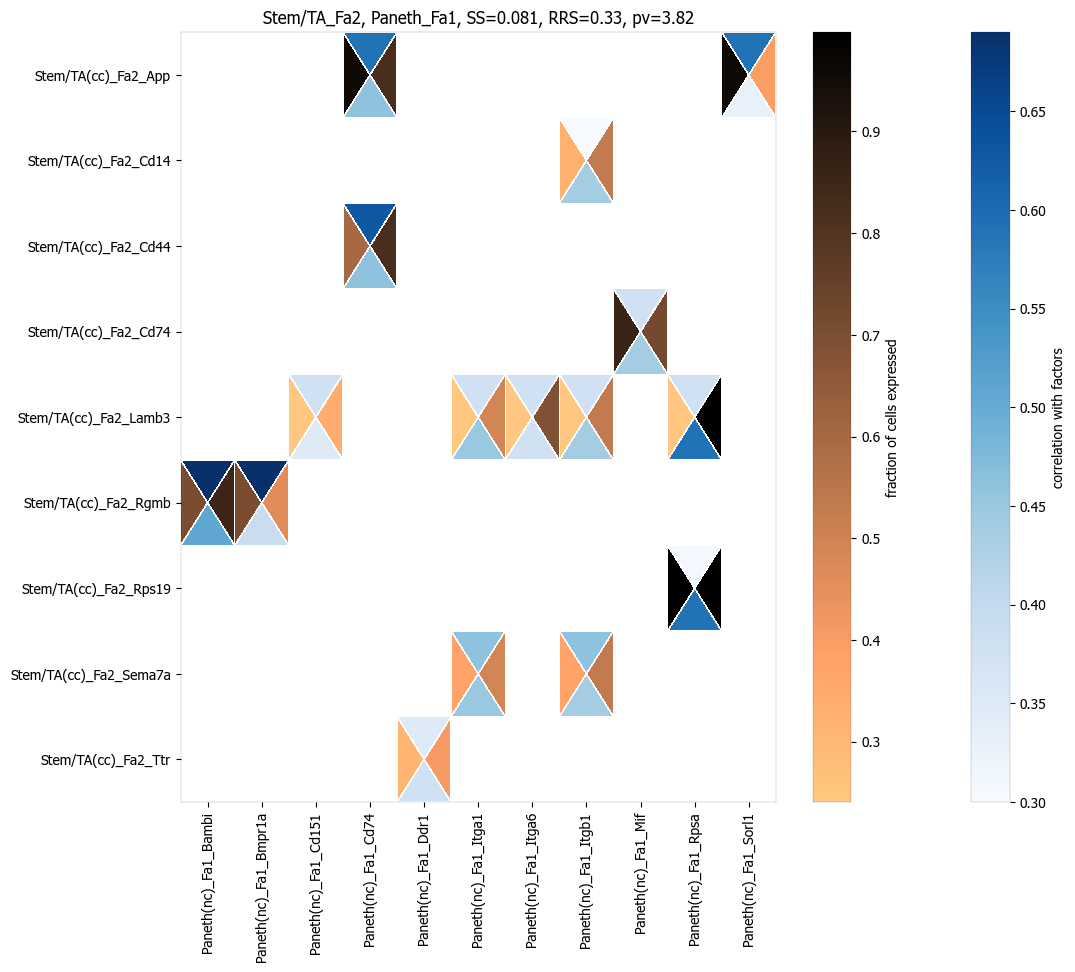

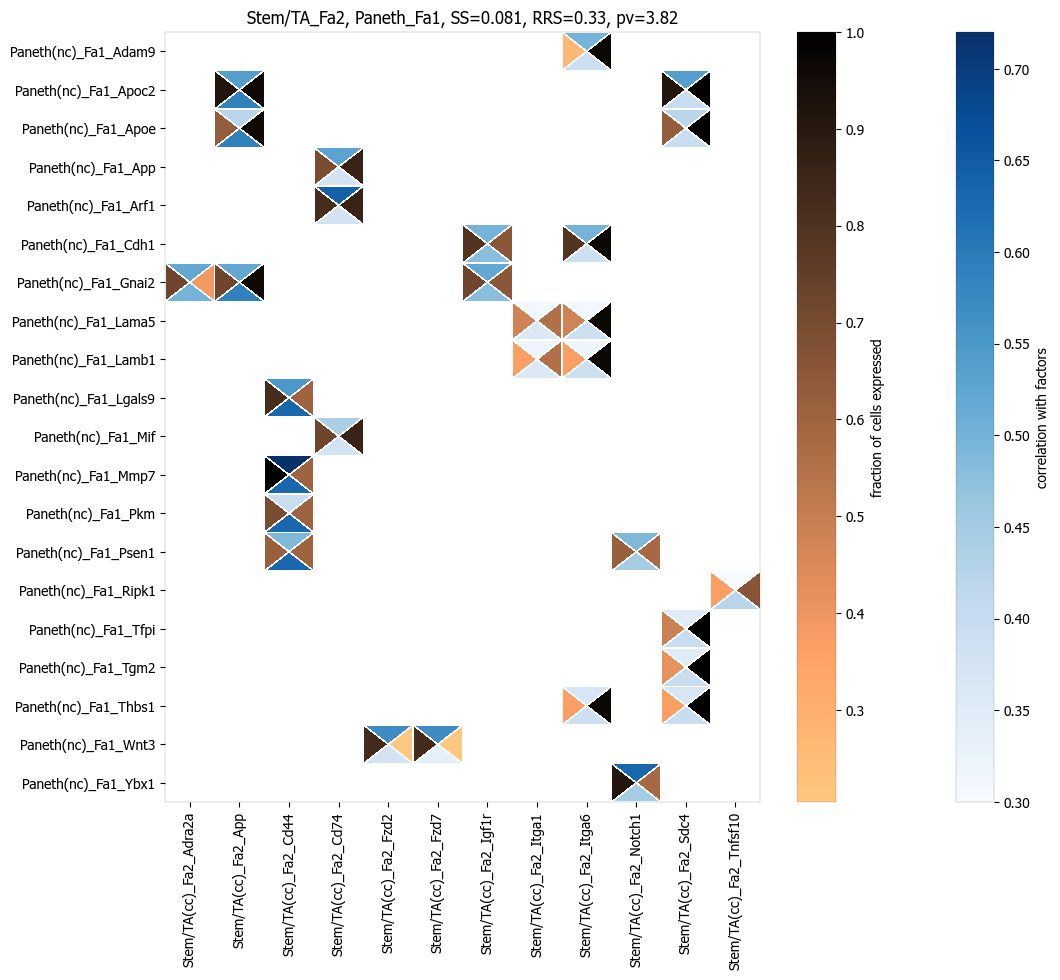

In [43]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
choose_factors_id=[2,1],
pvalueCutoff=0.05,
Ligand_Factor_thres=0.3,
Receptor_Factor_thres=0.3,
Ligand_proportion_of_cells_expressed_thres=0.2,
Receptor_proportion_of_cells_expressed_thres=0.2,
dpi=dpi,showit=showit,saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))


Perform ligand-receptors analysis of the Paneth cell niche including all
significant interaction partners.

choose_interacting_celltype_pair=[‘Paneth’] generates plots for all cell
types interacting sigificantly with Paneth cells. 

choose_factors_id=[] if empty, generate plots for all significantly covarying factors.


LR figures for both ways are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./nico_out/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


0

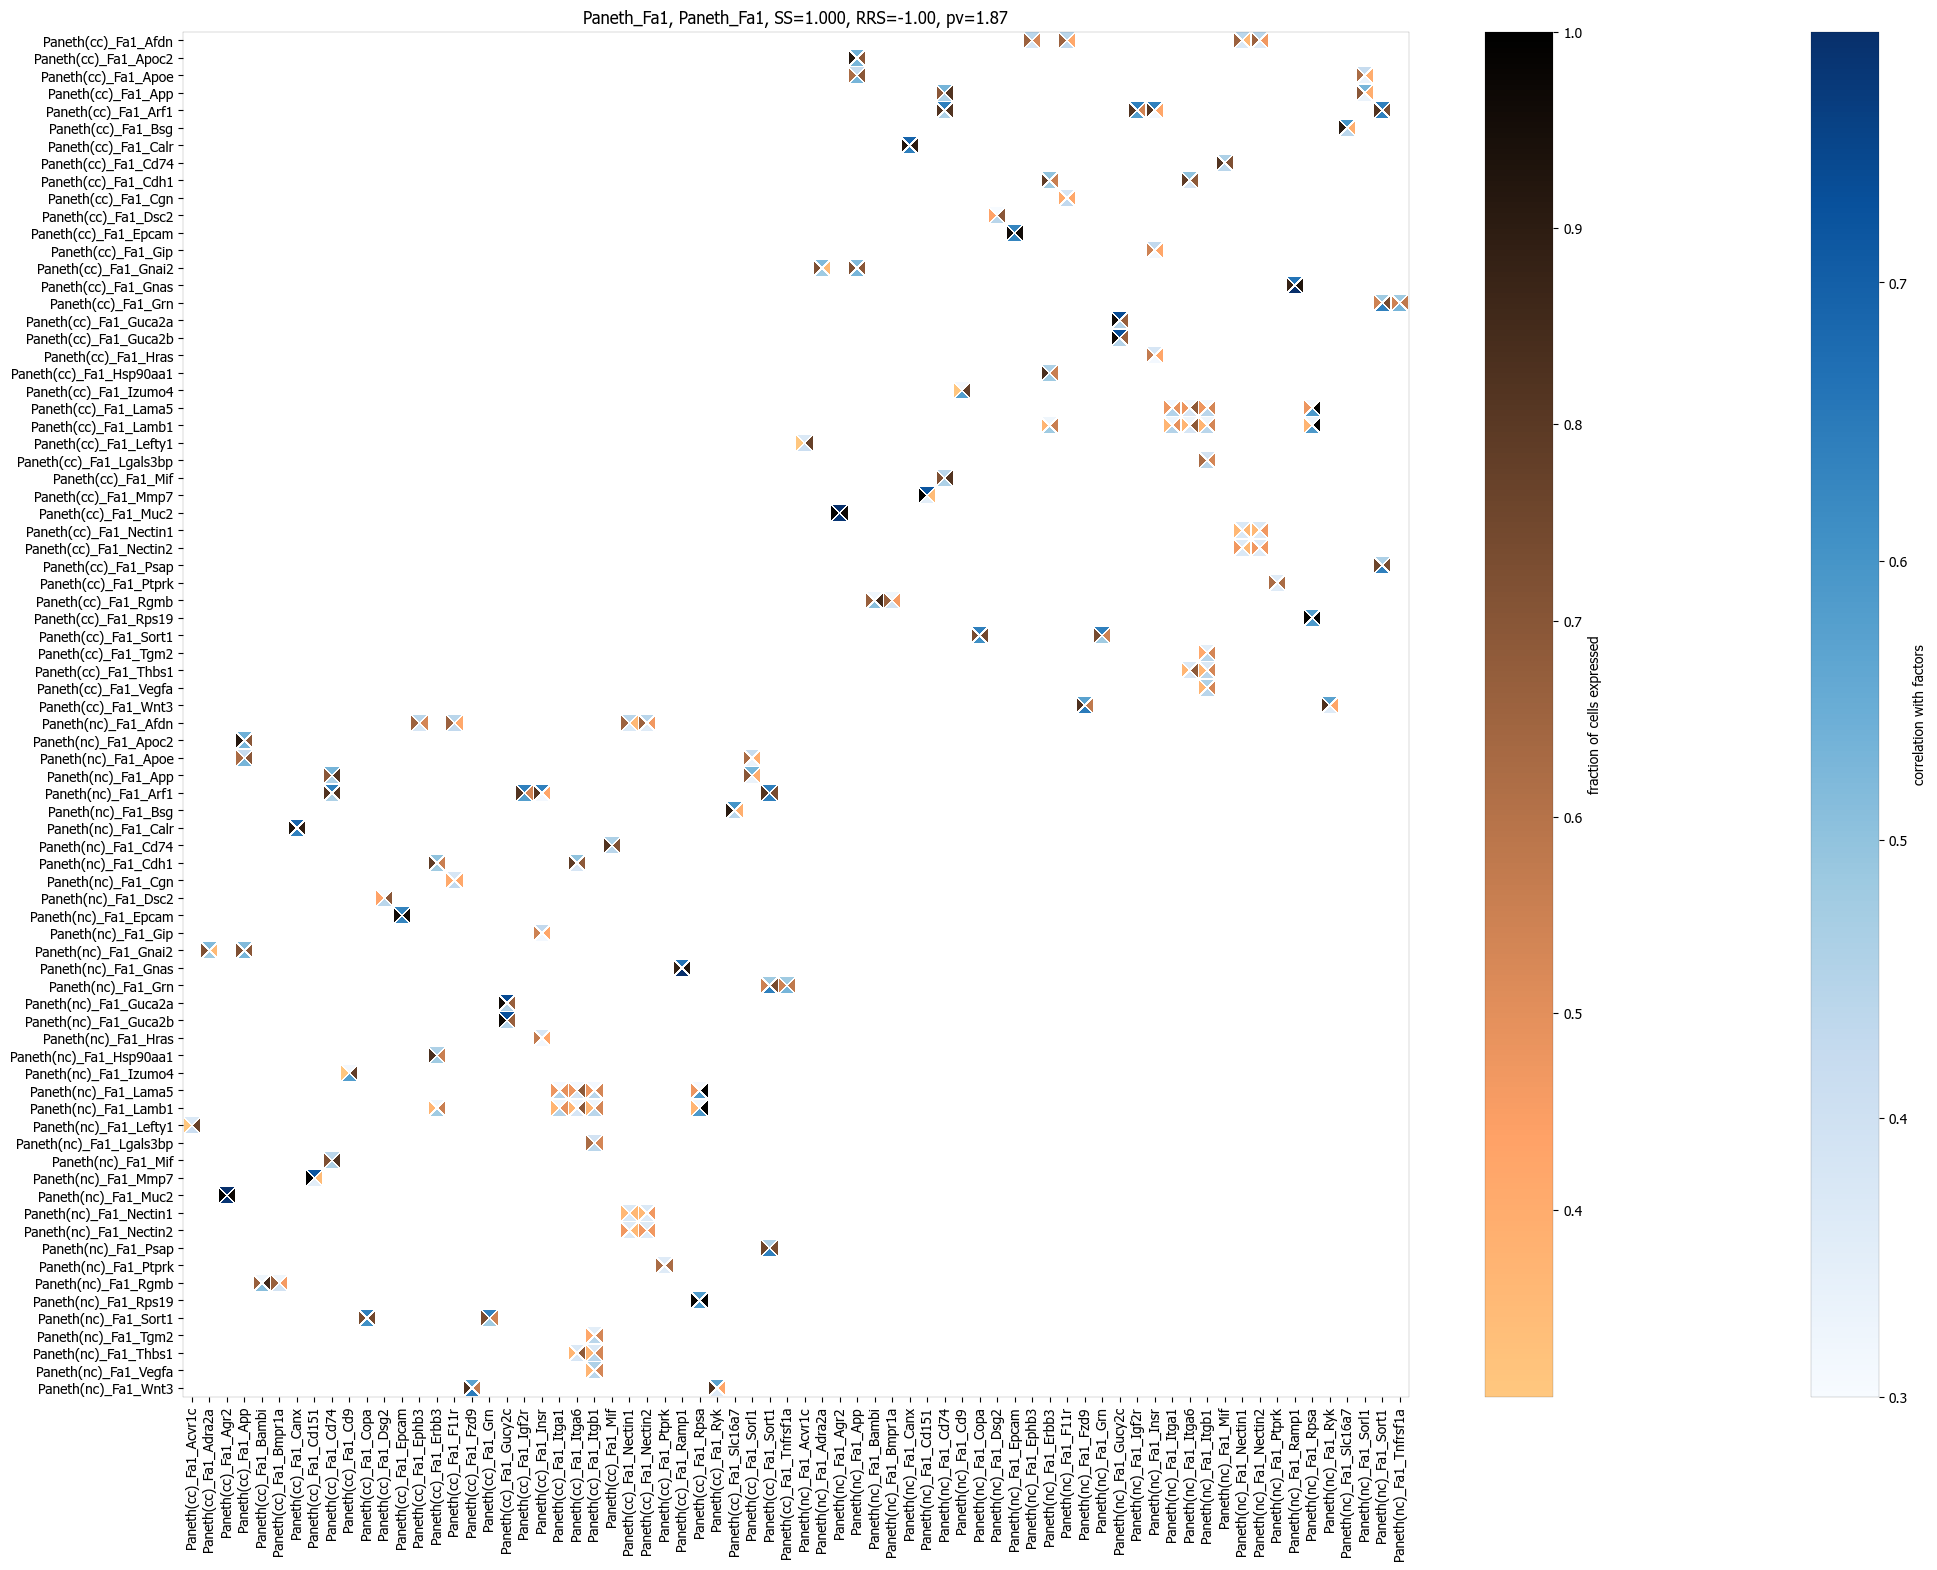

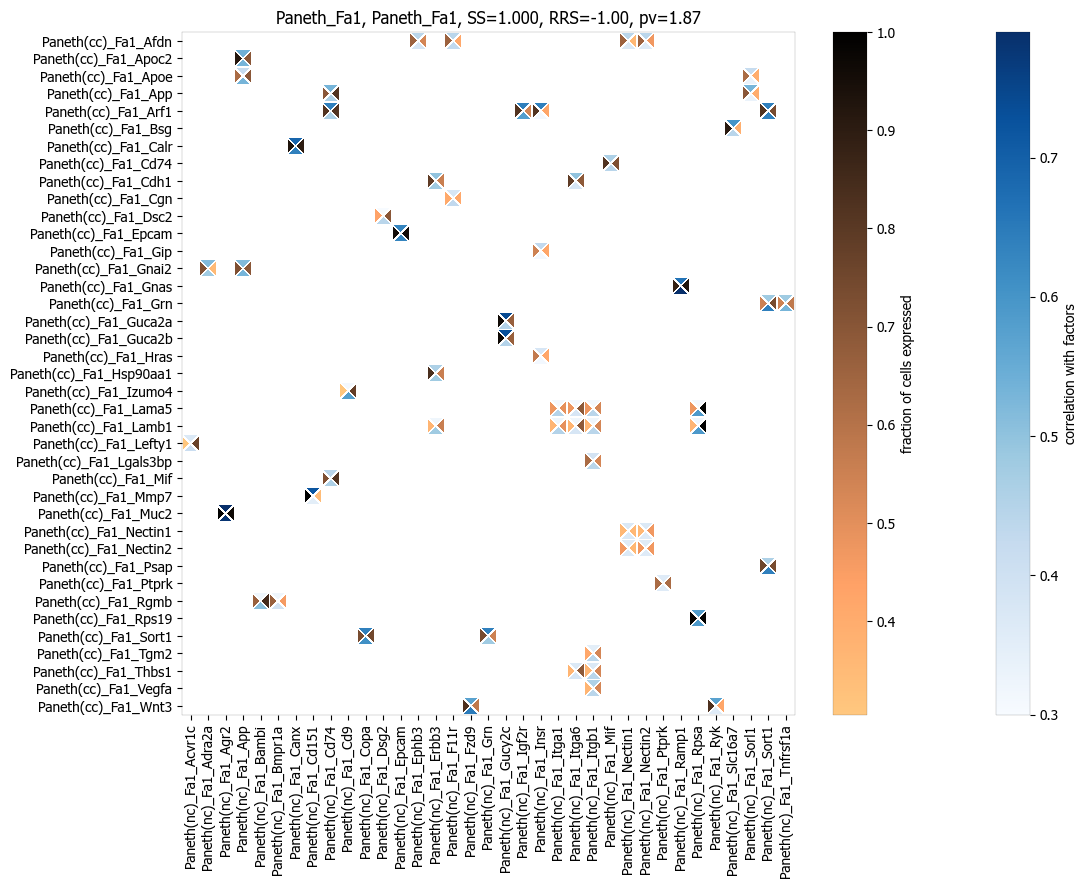

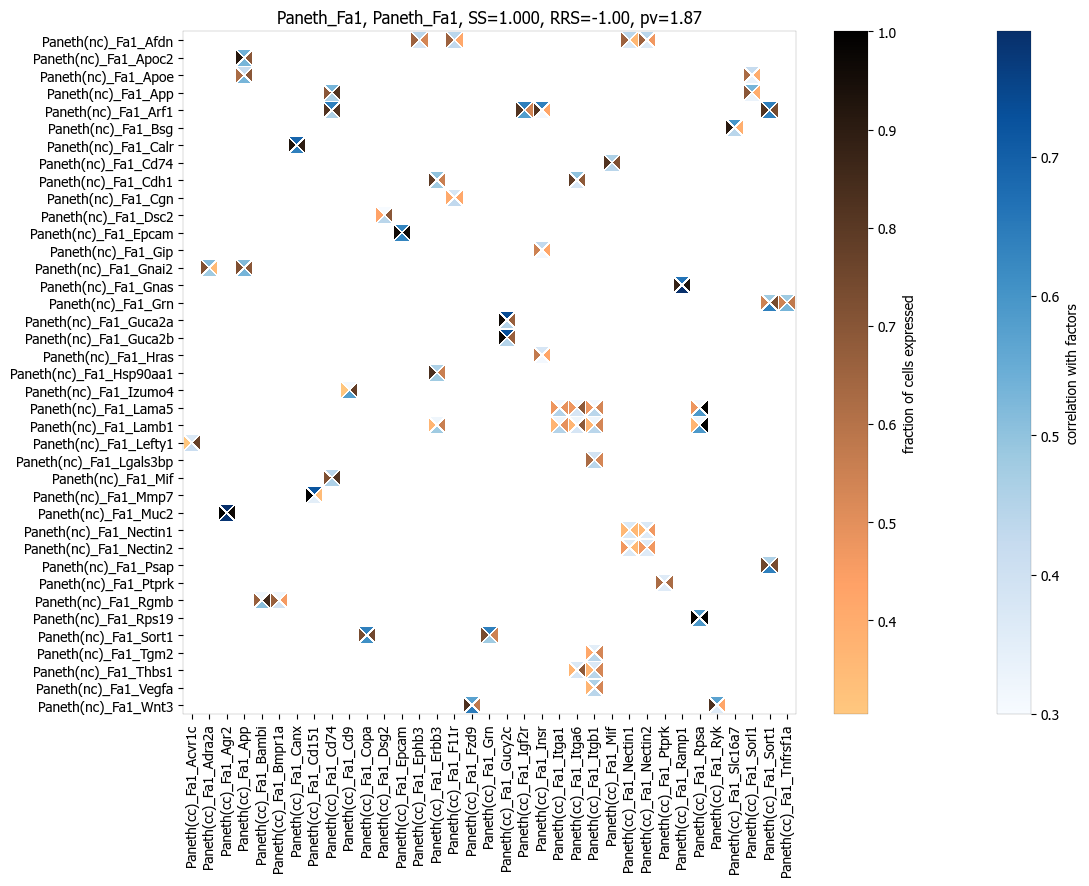

In [44]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Paneth'],
choose_factors_id=[], 
Ligand_Factor_thres=0.3,
Receptor_Factor_thres=0.3,
Ligand_proportion_of_cells_expressed_thres=0.3,
Receptor_proportion_of_cells_expressed_thres=0.3,
dpi=dpi,showit=showit,saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))


# Module F: Perform functional enrichment analysis for genes associated with latent factors 

### Example 1: Perform pathway enrichment analysis for factor-associated genes

In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, positively correlated <br>
(positively_correlated=True) with factor 2 (choose_factors_id=[2]) of <br>
Stem/TA cells (choose_celltypes=[‘Stem/TA’]) testing for enrichment of <br>
GO Biological Processes (database=[‘GO_Biological_Process_2021’]).

If savefigure=True, then the figures will be saved in the respective <br>
folder.

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


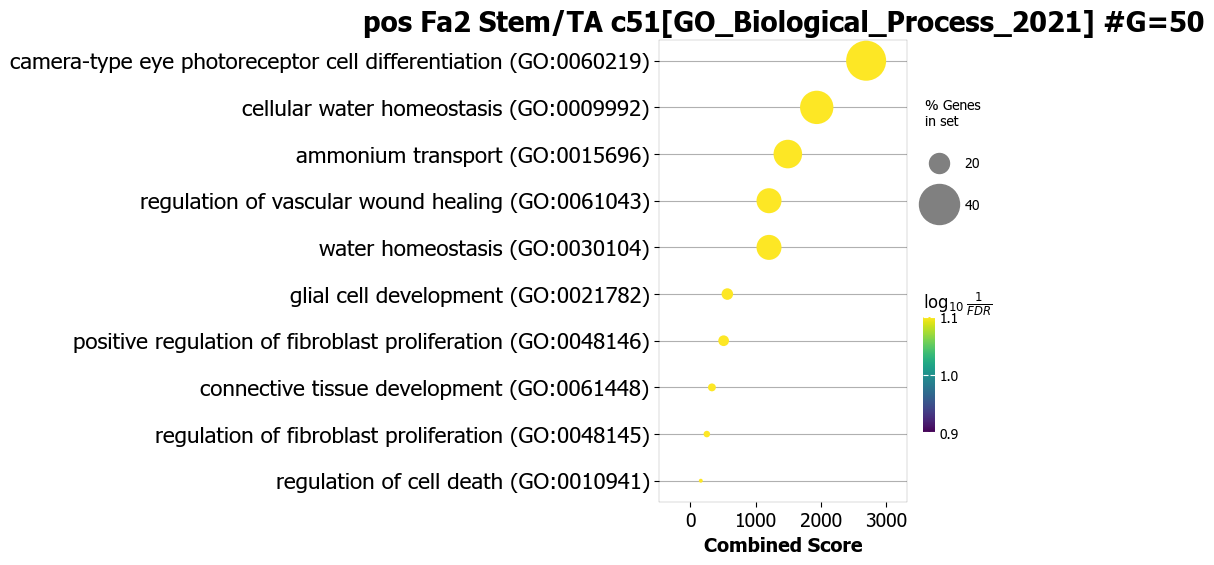

In [45]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
savefigure=False,
positively_correlated=True,
saveas=saveas,
rps_rpl_mt_genes_included=False,organism='Mouse', 
display_plot_as='dotplot',
correlation_with_spearman=True,
circlesize=12,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
fontsize=12,
showit=showit,
input_colormap='viridis')

### Example 2: increase the size of dot 

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


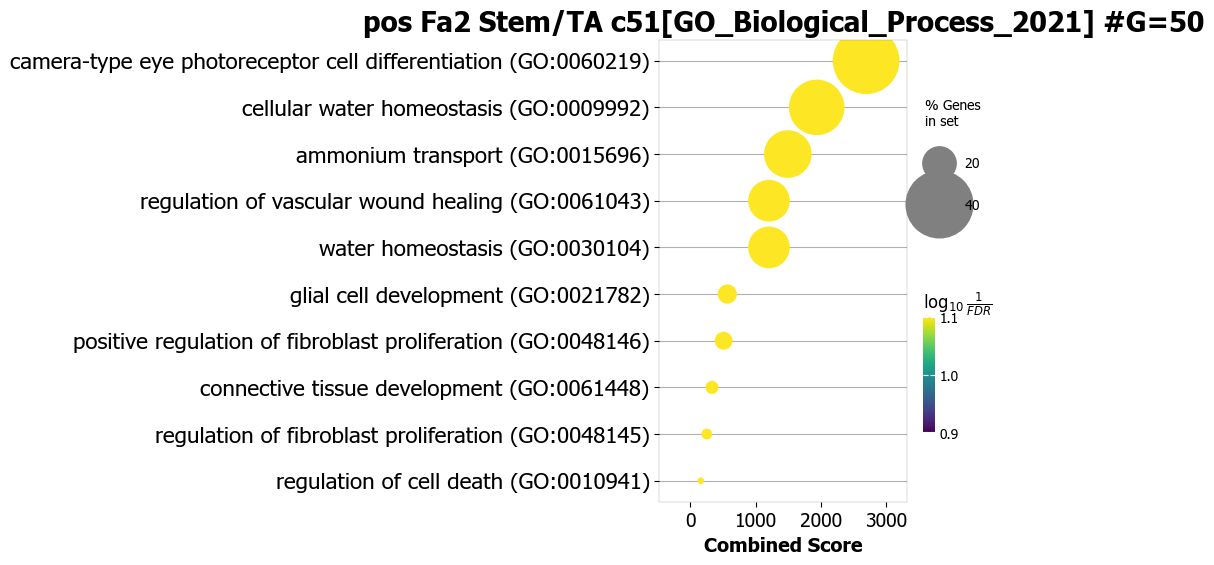

In [46]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
savefigure=False,
positively_correlated=True,
saveas=saveas,
rps_rpl_mt_genes_included=False,organism='Mouse', 
display_plot_as='dotplot',
correlation_with_spearman=True,
circlesize=20,
database=['GO_Biological_Process_2021'],
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
fontsize=12,
showit=showit,
input_colormap='viridis')

### Example 3: instead of dotplot show as a barplot 

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


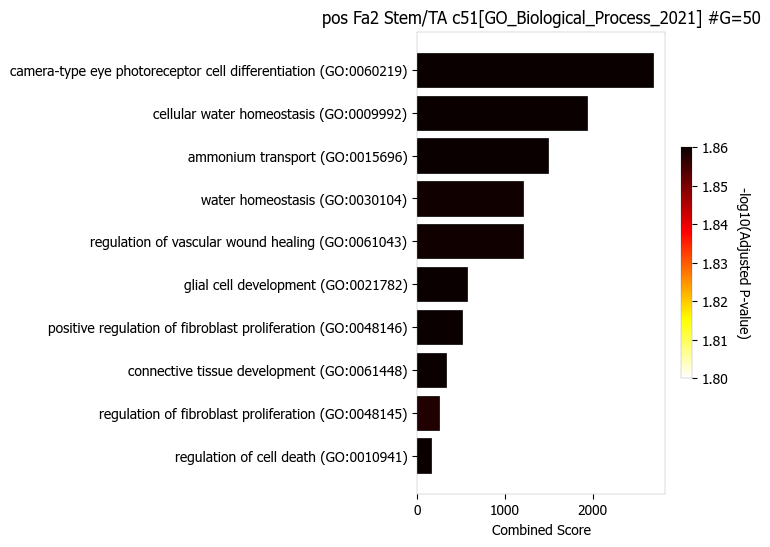

In [47]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=True,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,organism='Mouse',
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
showit=showit,saveas=saveas,
input_colormap='hot_r')

## Example 4 (Recommended version):  We recommend using the following version of the plot  

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


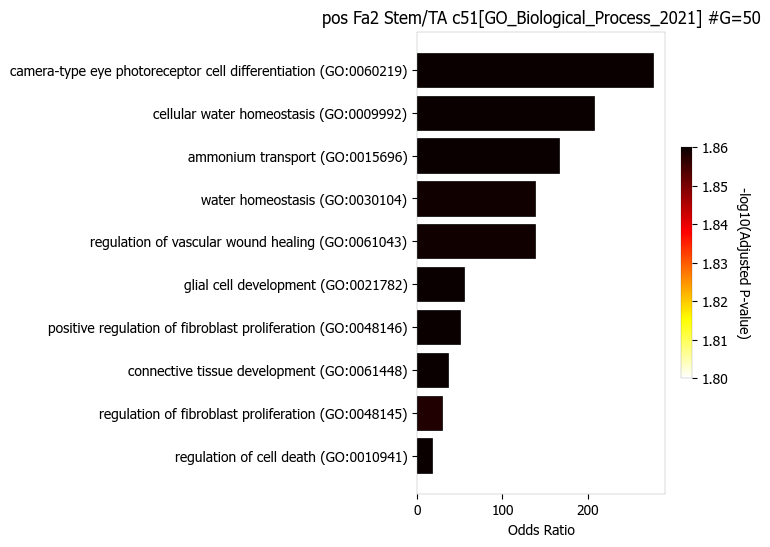

In [48]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=True,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,organism='Mouse',
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,saveas=saveas,
input_colormap='hot_r')

### Example 5
In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, negatively correlated <br>
(positively_correlated=False) with factor 2 (choose_factors_id=[2]) of <br>
Stem/TA cells (choose_celltypes=[‘Stem/TA’]) testing for enrichment of <br>
GO Biological Processes (database=[‘GO_Biological_Process_2021’]).

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


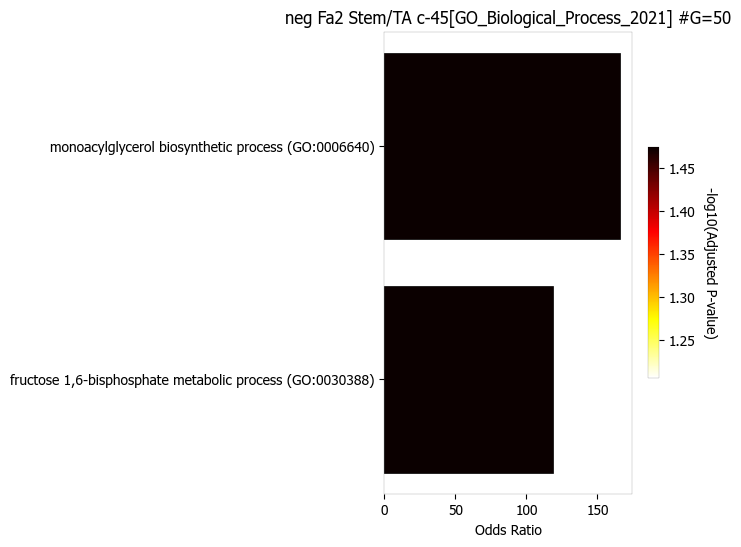

In [49]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,organism='Mouse',
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,saveas=saveas,
input_colormap='hot_r')

### Example 6 
In this example, pathway analyses are performed for the top 50 <br>
(NOG_pathway=50) genes, positively correlated <br>
(positively_correlated=True) with any factor (choose_factors_id=[]) of <br>
Paneth cells (choose_celltypes=[‘Paneth’]), ribosome and mitochondrial <br>
genes are not included in the gene list testing for enrichment of <br>
pathways from three databases (GO_Biological_Process_2021, BioPlanet_2019, Reactome_2016).



In [50]:
'''
scov.pathway_analysis(cov_out,
choose_celltypes=['Paneth'],
NOG_pathway=50,
choose_factors_id=[],
positively_correlated=True,
savefigure=False, 
rps_rpl_mt_genes_included=False,
#database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,saveas=saveas,
input_colormap='hot_r')
'''

"\nscov.pathway_analysis(cov_out,\nchoose_celltypes=['Paneth'],\nNOG_pathway=50,\nchoose_factors_id=[],\npositively_correlated=True,\nsavefigure=False, \nrps_rpl_mt_genes_included=False,\n#database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],\ndisplay_plot_as='barplot',\nobject_for_color='Adjusted P-value',\nobject_for_xaxis='Odds Ratio',\nshowit=showit,saveas=saveas,\ninput_colormap='hot_r')\n"

### Example 7 
In this example, pathway analysis is performed for negatively correlated <br>
(positively_correlated=False) with factor 2 (choose_factors_id=[2]) of <br>
Goblet cells (choose_celltypes=[‘Goblet’]) testing for enrichment of <br>
BioPlanet pathways (database=[‘BioPlanet_2019’]).
Object_for_color='Odds Ratio' and 
Object_for_xaxis='Adjusted P-value' 

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Goblet']


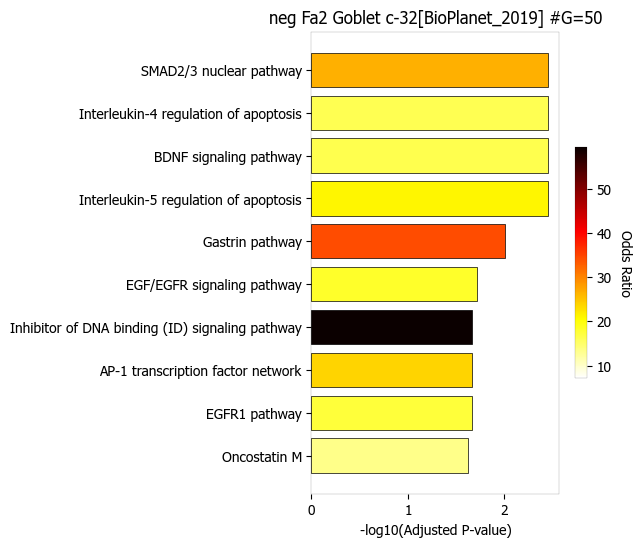

In [51]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Goblet'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
savefigure=False,
rps_rpl_mt_genes_included=False,organism='Mouse',
database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Odds Ratio',#columntag  P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,
object_for_xaxis= 'Adjusted P-value',#Odds Ratio', #'Combined Score'
showit=showit,saveas=saveas,
input_colormap='hot_r')

### Example 8
Object_for_color='Combined Score' and Object_for_xaxis='P-value'

The pathway figures are saved in  ./nico_out/covariations_R0_F3/Pathway_figures/
cell types found  ['Goblet']


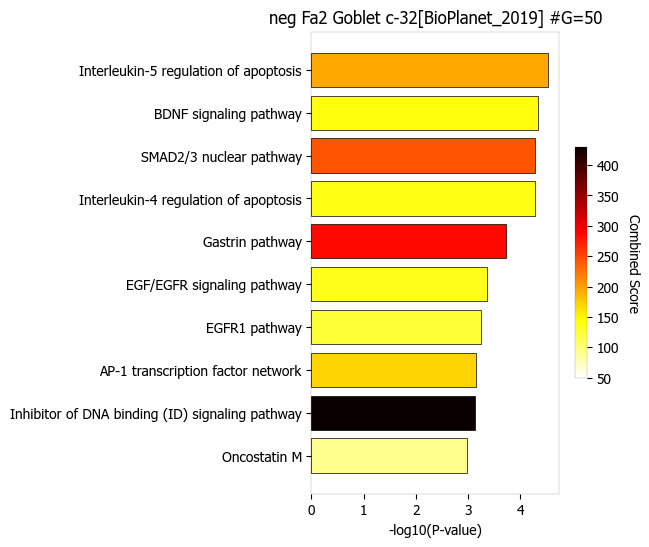

In [52]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Goblet'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
savefigure=False,
rps_rpl_mt_genes_included=False,organism='Mouse',
database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Combined Score',#columntag  P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,
object_for_xaxis= 'P-value',#Odds Ratio', #'Combined Score'
showit=showit,saveas=saveas,
input_colormap='hot_r')

# Module G: Visualization of top genes across cell types and factors as dotplot

Show the top 20 positively and negatively correlated genes (top_NOG=20) <br>
for all latent factors and the average expression of these genes on a <br>
log scale in a single plot. In this example, plots are generated for <br>
Paneth and Stem/TA cells.

If choose_celltypes=[], the plot will be generated for all cell <br>
types.

cell types found  ['Paneth', 'Stem/TA']
The figures are saved:  ./nico_out/covariations_R0_F3/dotplots/Paneth.png
The figures are saved:  ./nico_out/covariations_R0_F3/dotplots/Stem_TA.png


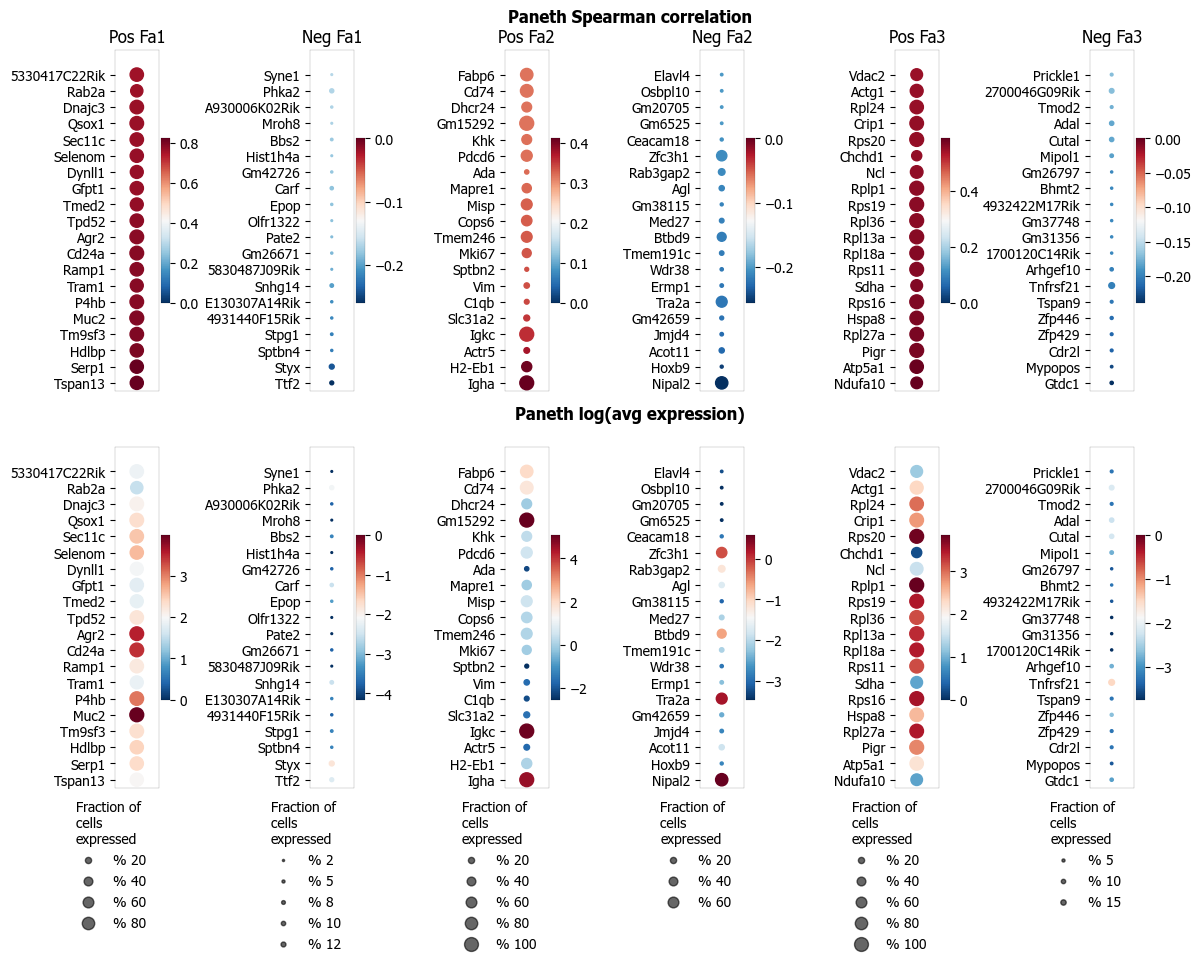

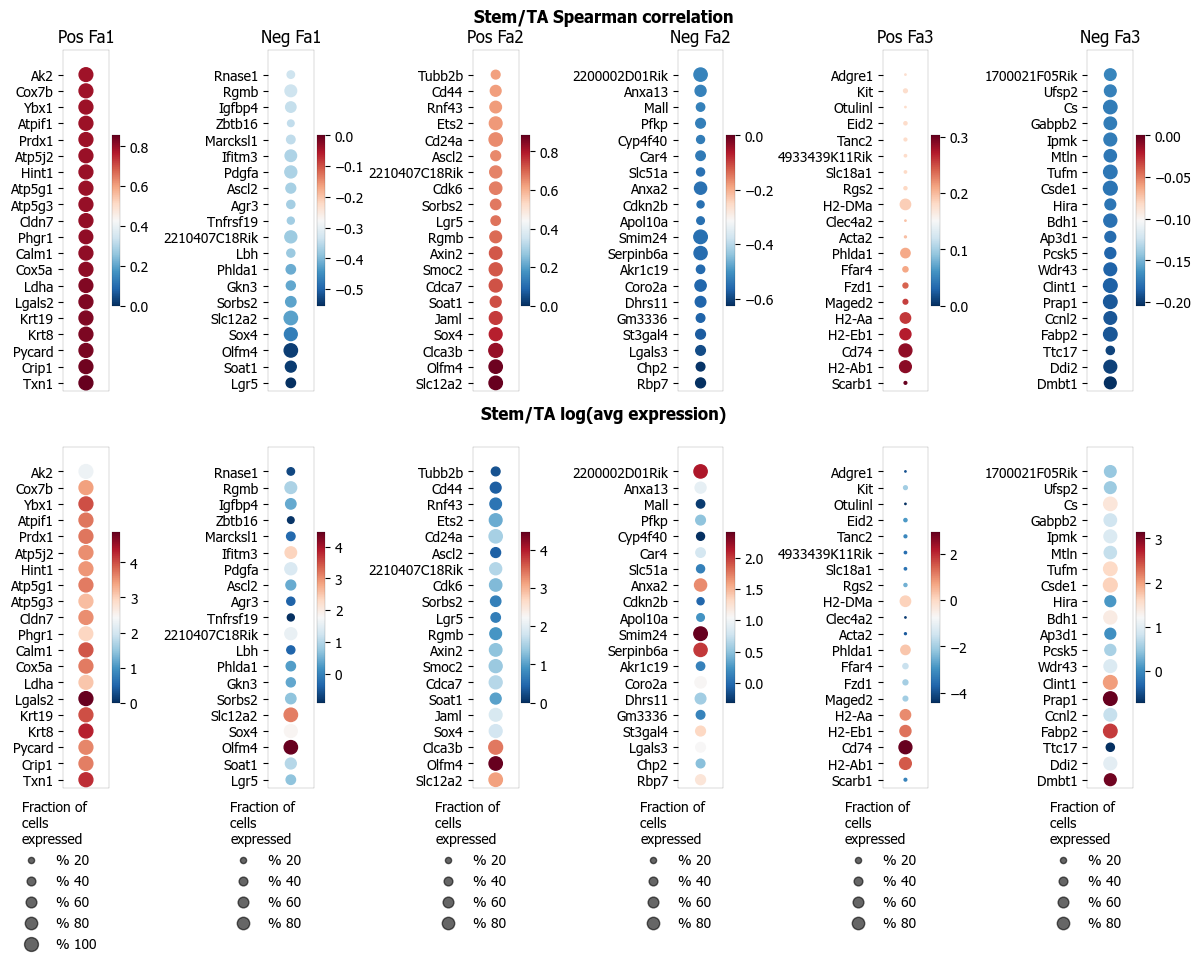

In [53]:
scov.plot_top_genes_for_a_given_celltype_from_all_factors(
cov_out,choose_celltypes=['Paneth','Stem/TA'],
organism='Mouse',rps_rpl_mt_genes_included=True,  
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode,showit=showit)
                        

The figures are saved:  ./nico_out/covariations_R0_F3/dotplots/combined_Stem_TA_Paneth.png


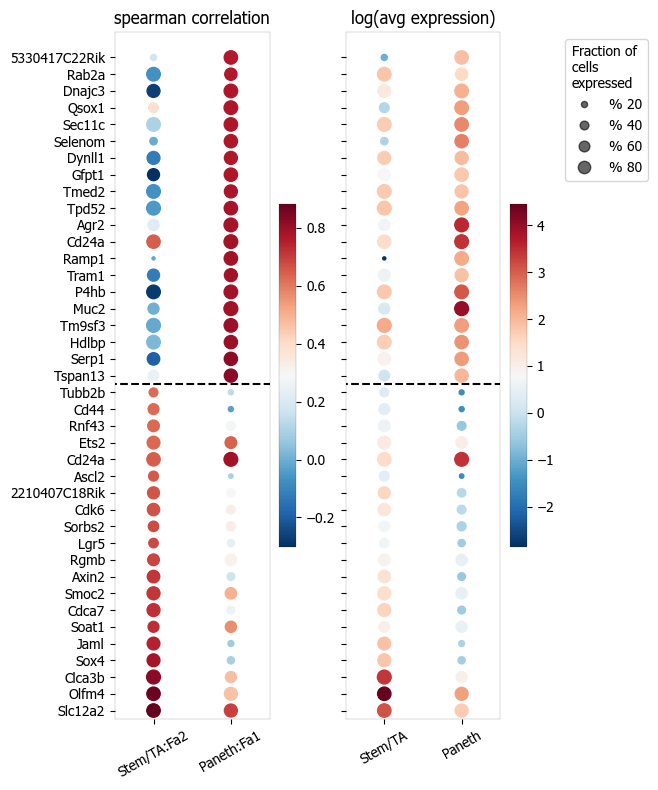

In [54]:
scov.plot_top_genes_for_pair_of_celltypes_from_two_chosen_factors(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
organism='Mouse',rps_rpl_mt_genes_included=True,  
visualize_factors_id=[2,1],figsize=(7, 8),
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode,showit=showit)

# Module H: Visualize factor values in the UMAP

Visualize factor values for select cell types, e.g., Stem/TA and Paneth <br>
cells (choose_interacting_celltype_pair=[‘Stem/TA’,‘Paneth’]) in <br>
scRNA-seq data umap. Select factors for each cell type <br>
(visualize_factors_id=[1,1]).

List entries correspond to cell types in <br>
choose_interacting_celltype_pair.



The figures are saved:  ./nico_out/covariations_R0_F3/scRNAseq_factors_in_umap.png


0

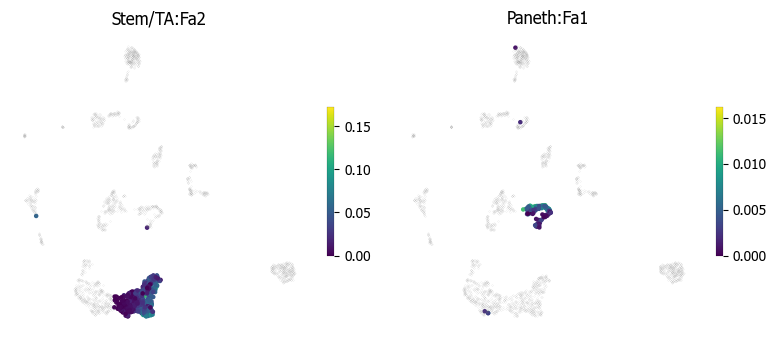

In [55]:
scov.visualize_factors_in_scRNAseq_umap(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
visualize_factors_id=[2,1],
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(8,3.5))

Visualize factor values for select cell types, e.g., Stem/TA and Paneth cells <br>
(choose_interacting_celltype_pair=['Stem/TA','Paneth']) in the spatial transcriptomics data UMAP. <br>
Select factors for each cell type (visualize_factors_id=[1,1]). <br>
List entries correspond to cell types in choose_interacting_celltype_pair.




The figures are saved:  ./nico_out/covariations_R0_F3/spatial_factors_in_umap.png


0

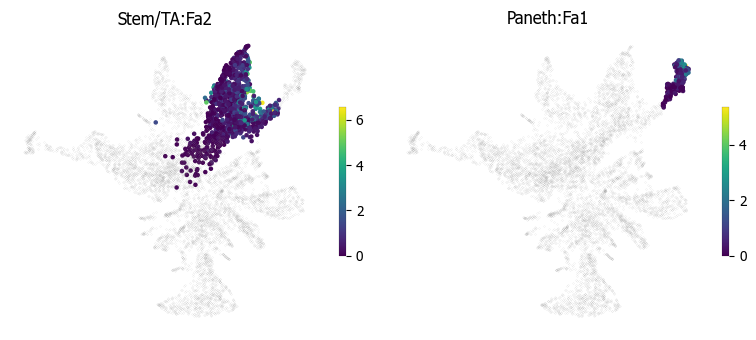

In [56]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[2,1],
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(8,3.5))


The figures are saved:  ./nico_out/covariations_R0_F3/spatial_factors_in_umap.png
The figures are saved:  ./nico_out/covariations_R0_F3/scRNAseq_factors_in_umap.png


0

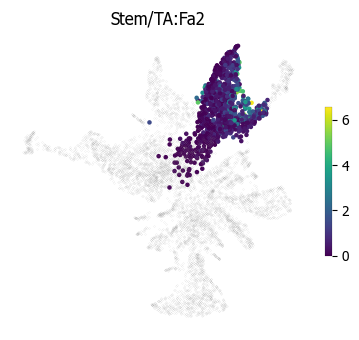

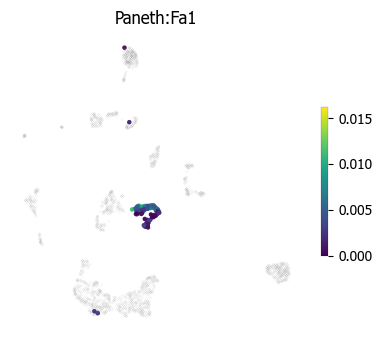

In [57]:
#For visualization of one cell type at a time only 


scov.visualize_factors_in_spatial_umap(cov_out, 
visualize_factors_id=[2],
choose_interacting_celltype_pair=['Stem/TA'],
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(4,3.5))

scov.visualize_factors_in_scRNAseq_umap(cov_out,
#refpath=ref_datapath,
choose_interacting_celltype_pair=['Paneth'],
visualize_factors_id=[1],
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(4,3.5))
